# Importing the nessecary dependencies.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import unittest
%matplotlib inline

In [2]:
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 10, 5
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [3]:
#def run_tests():
#  unittest.main(argv=[''], verbosity=1, exit=False)

In [4]:
df_train = pd.read_csv('train.csv')
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
#df_train['OverallQual']

In [6]:
#df_train.isnull().sum()

In [7]:
#for col in df_train.columns:
#    print(col)

# Data exploration

In [8]:
# check correlation
df_train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [9]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

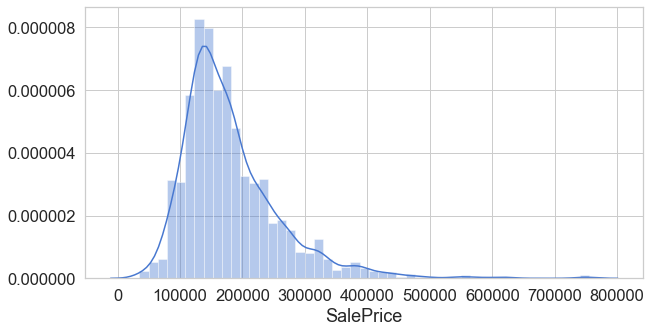

In [10]:
sns.distplot(df_train['SalePrice'])
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


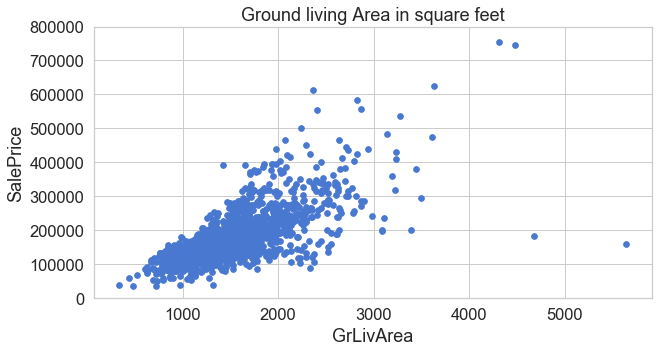

In [11]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), s=32,title = 'Ground living Area in square feet');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


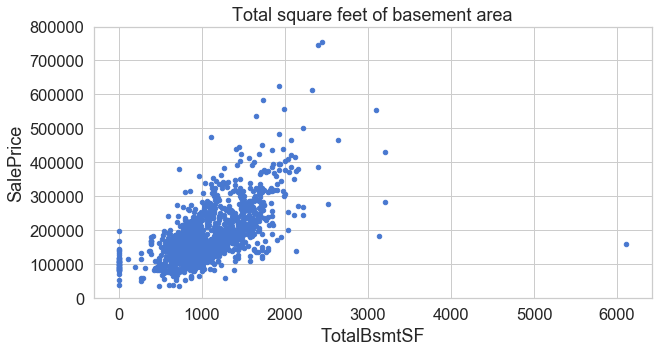

In [12]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), title='Total square feet of basement area');

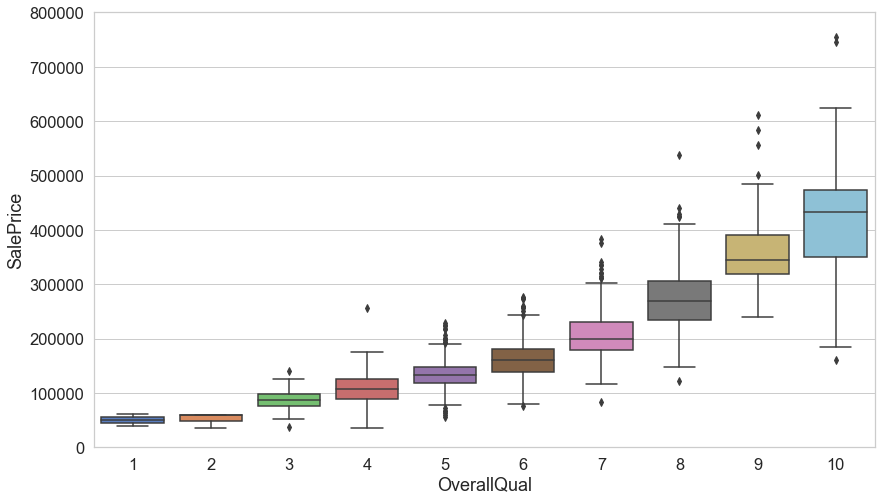

In [13]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


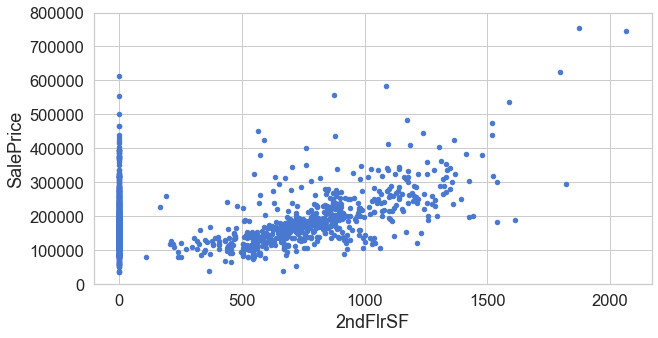

In [14]:
var = '2ndFlrSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

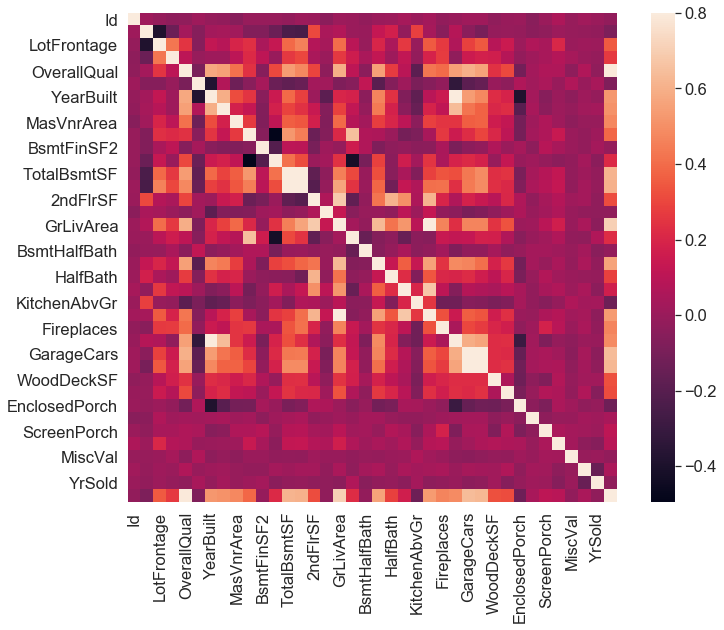

In [15]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

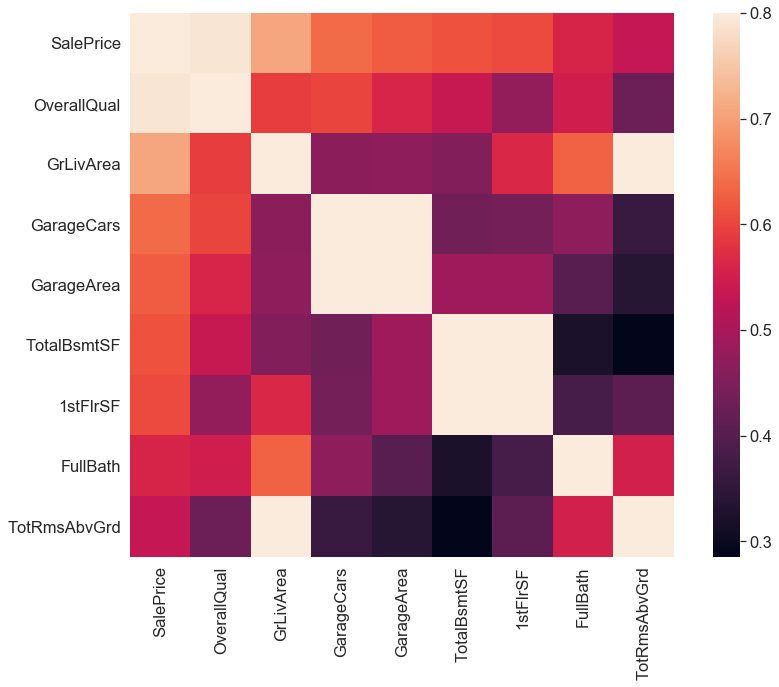

In [16]:
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df_train[cols].corr(), vmax=.8, square=True);

# Selection of attributes with correlation > 30%

In [112]:
#df_train['BsmtFinSF1']

In [113]:
# creating new data set
New_data1 = df_train[['YearBuilt','2ndFlrSF','GrLivArea','FullBath','OverallQual','1stFlrSF','GarageCars','GarageArea','BedroomAbvGr','TotalBsmtSF','TotRmsAbvGrd','YearRemodAdd','GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1','LotFrontage','WoodDeckSF','OpenPorchSF','HalfBath','LotArea','SalePrice']]

In [114]:
#New_data1

In [115]:
#New_data1.isnull().sum()

In [116]:
#New_data1['GarageYrBlt'].describe()

In [117]:
New_data1['GarageYrBlt'].fillna(New_data1['GarageYrBlt'].mean(),inplace = True)

E:\Anaconda\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [118]:
#New_data1['MasVnrArea'].describe()

In [119]:
New_data1['MasVnrArea'].fillna(New_data1['MasVnrArea'].mean(),inplace = True)

In [120]:
#New_data1.isnull().sum()

In [121]:
New_data1['LotFrontage'].fillna(New_data1['LotFrontage'].mean(),inplace = True)

In [122]:
#New_data1.isnull().sum()

In [123]:
#New_data1 = df_train[['YearBuilt','2ndFlrSF','GrLivArea','FullBath','OverallQual','1stFlrSF','GarageCars','GarageArea','BedroomAbvGr','TotalBsmtSF','TotRmsAbvGrd','YearRemodAdd','GarageYrBlt','SalePrice']]
X1 = New_data1.drop(columns=['SalePrice'])
Y1 = New_data1[['SalePrice']]
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.10, random_state=101)

# Feature Scalling

In [124]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X1_train = s_scaler.fit_transform(X1_train.astype(np.float))
X1_test = s_scaler.transform(X1_test.astype(np.float))

# Method1: Multiple Linear Regression

In [125]:
#Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X1_train, y1_train)

#evaluate the model (intercept and slope)
regressor.intercept_
regressor.coef_

array([[ 4222.07618662,  9591.64242284,  9074.73248548,  -587.37879293,
        26050.15761211, 10667.17045396,  8823.57194897,   184.15441676,
        -5944.51817505,  4916.42971309,  6703.45784044,  6499.36556062,
         1145.79084959,  5806.39417655,  3894.05077144,  6709.39149516,
          731.57807126,  3263.87931555,  1436.46386014,  -565.76044598,
         4957.70014172]])

In [126]:
y1_predd = regressor.predict(X1_test)
data1 = pd.DataFrame()
data1['Actual'] = list(y1_test['SalePrice'])
data1['Predicted'] = y1_predd
data1

,Actual,Predicted
0,255000,265538.608368
1,145000,135193.628718
2,150500,134261.729653
3,412500,371753.042140
4,402861,353266.652517
...,...,...
141,184000,188680.891091
142,95000,91113.759140
143,112500,92385.472921
144,163000,203393.185318


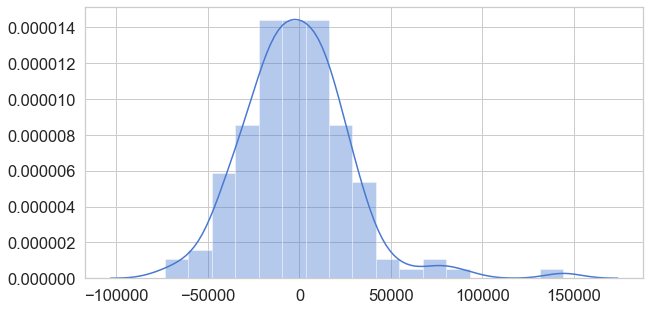

In [127]:
fig = plt.figure(figsize=(10,5))
residuals = (y1_test- y1_predd)
sns.distplot(residuals)

In [128]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y1_test, y1_predd))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y1_test, y1_predd)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y1_test, y1_predd))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y1_test,y1_predd)))

Mean Absolute Error: 21586.65
Mean Squared Error:848975941.36
Root Mean Squared Error:29137.19
Variance score is: 0.83


In [129]:
New_data1['SalePrice'].mean()

180921.19589041095

In [130]:
print('Linear Regression Model:')
print("Train Score {:.2f}".format(regressor.score(X1_train,y1_train)))
print("Test Score {:.2f}".format(regressor.score(X1_test, y1_test)))

Linear Regression Model:
Train Score 0.79
Test Score 0.83


# Method2: Keras Regression

## 1st Model of Neural Networks

In [245]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [246]:
# having 19 nueron is based on the number of available featurs

model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
#model.add(Dense(19,activation='relu'))
#model.add(Dense(19,activation='relu'))
#model.add(Dense(19,activation='relu'))
#model.add(Dense(19,activation='relu'))
#model.add(Dense(19,activation='relu'))
#model.add(Dense(19,activation='relu'))
#model.add(Dense(19,activation='relu'))
#model.add(Dense(19,activation='relu'))
#model.add(Dense(1,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [247]:
y1_train = np.array(y1_train)


In [248]:
#model.fit(X_train, y_train, epochs=500, callbacks=[keras.callbacks.EarlyStopping(patience=3)])


model.fit(x=X1_train,y=y1_train,
          validation_data=(X1_test,y1_test),
          batch_size=128,epochs=550,)

Train on 1314 samples, validate on 146 samples
Epoch 1/550
1314/1314 [==============================] - 2s 1ms/sample - loss: 39291591279.4399 - val_loss: 36769340738.6301
Epoch 2/550
1314/1314 [==============================] - 0s 18us/sample - loss: 39291448564.7001 - val_loss: 36769235280.6575
Epoch 3/550
1314/1314 [==============================] - 0s 21us/sample - loss: 39291340996.3836 - val_loss: 36769131814.5753
Epoch 4/550
1314/1314 [==============================] - 0s 24us/sample - loss: 39291212823.3790 - val_loss: 36768987837.3699
Epoch 5/550
1314/1314 [==============================] - 0s 26us/sample - loss: 39291024906.1309 - val_loss: 36768759751.8904
Epoch 6/550
1314/1314 [==============================] - 0s 27us/sample - loss: 39290701403.1781 - val_loss: 36768351947.3973
Epoch 7/550
1314/1314 [==============================] - 0s 24us/sample - loss: 39290107894.6484 - val_loss: 36767563888.2192
Epoch 8/550
1314/1314 [==============================] - 0s 22us/sample 

1314/1314 [==============================] - 0s 18us/sample - loss: 5309794110.7336 - val_loss: 4787022181.6986
Epoch 66/550
1314/1314 [==============================] - 0s 19us/sample - loss: 5233569925.6499 - val_loss: 4699236173.1507
Epoch 67/550
1314/1314 [==============================] - 0s 18us/sample - loss: 5161150345.5464 - val_loss: 4613237858.1918
Epoch 68/550
1314/1314 [==============================] - 0s 19us/sample - loss: 5089248992.4384 - val_loss: 4535966257.0959
Epoch 69/550
1314/1314 [==============================] - 0s 19us/sample - loss: 5022696792.0609 - val_loss: 4456991316.1644
Epoch 70/550
1314/1314 [==============================] - 0s 19us/sample - loss: 4953506166.4536 - val_loss: 4389878622.6849
Epoch 71/550
1314/1314 [==============================] - 0s 21us/sample - loss: 4890666447.6834 - val_loss: 4330683770.7397
Epoch 72/550
1314/1314 [==============================] - 0s 19us/sample - loss: 4822761970.7519 - val_loss: 4264136935.4521
Epoch 73/550


Epoch 130/550
1314/1314 [==============================] - 0s 21us/sample - loss: 2351220488.1826 - val_loss: 1894779984.6575
Epoch 131/550
1314/1314 [==============================] - 0s 23us/sample - loss: 2329099795.8721 - val_loss: 1875190995.2877
Epoch 132/550
1314/1314 [==============================] - 0s 17us/sample - loss: 2312073253.7960 - val_loss: 1855101001.6438
Epoch 133/550
1314/1314 [==============================] - 0s 19us/sample - loss: 2294410524.0548 - val_loss: 1845537443.0685
Epoch 134/550
1314/1314 [==============================] - 0s 18us/sample - loss: 2275240865.7047 - val_loss: 1829688770.6301
Epoch 135/550
1314/1314 [==============================] - 0s 20us/sample - loss: 2259318405.6499 - val_loss: 1819685347.9452
Epoch 136/550
1314/1314 [==============================] - 0s 18us/sample - loss: 2239915563.4460 - val_loss: 1803570970.3014
Epoch 137/550
1314/1314 [==============================] - 0s 21us/sample - loss: 2223535496.1826 - val_loss: 17901663

1314/1314 [==============================] - 0s 20us/sample - loss: 1678189323.8843 - val_loss: 1326211672.5479
Epoch 196/550
1314/1314 [==============================] - 0s 21us/sample - loss: 1672434200.9376 - val_loss: 1320420793.8630
Epoch 197/550
1314/1314 [==============================] - 0s 21us/sample - loss: 1675463219.4338 - val_loss: 1301124401.9726
Epoch 198/550
1314/1314 [==============================] - 0s 22us/sample - loss: 1658099495.3546 - val_loss: 1312127177.6438
Epoch 199/550
1314/1314 [==============================] - 0s 21us/sample - loss: 1653881846.9406 - val_loss: 1329516486.1370
Epoch 200/550
1314/1314 [==============================] - 0s 18us/sample - loss: 1651828721.9726 - val_loss: 1317333917.8082
Epoch 201/550
1314/1314 [==============================] - 0s 21us/sample - loss: 1642583915.9330 - val_loss: 1323986151.4521
Epoch 202/550
1314/1314 [==============================] - 0s 20us/sample - loss: 1644983607.3303 - val_loss: 1341696029.8082
Epoch 

1314/1314 [==============================] - 0s 21us/sample - loss: 1405270319.4399 - val_loss: 1105169066.0822
Epoch 261/550
1314/1314 [==============================] - 0s 19us/sample - loss: 1402619383.6225 - val_loss: 1104353874.4110
Epoch 262/550
1314/1314 [==============================] - 0s 20us/sample - loss: 1399998351.1963 - val_loss: 1101196365.1507
Epoch 263/550
1314/1314 [==============================] - 0s 18us/sample - loss: 1397012278.9406 - val_loss: 1102430062.4658
Epoch 264/550
1314/1314 [==============================] - 0s 20us/sample - loss: 1395877414.5753 - val_loss: 1094025757.8082
Epoch 265/550
1314/1314 [==============================] - 0s 18us/sample - loss: 1391650792.6210 - val_loss: 1097242270.6849
Epoch 266/550
1314/1314 [==============================] - 0s 20us/sample - loss: 1388996374.5997 - val_loss: 1092152160.4384
Epoch 267/550
1314/1314 [==============================] - 0s 19us/sample - loss: 1386470820.4323 - val_loss: 1089485304.9863
Epoch 

1314/1314 [==============================] - 0s 20us/sample - loss: 1267787694.9528 - val_loss: 977352177.9726
Epoch 325/550
1314/1314 [==============================] - 0s 19us/sample - loss: 1265191484.8828 - val_loss: 977695736.9863
Epoch 326/550
1314/1314 [==============================] - 0s 23us/sample - loss: 1261951864.0122 - val_loss: 983918346.5205
Epoch 327/550
1314/1314 [==============================] - 0s 21us/sample - loss: 1263585411.7017 - val_loss: 975969145.8630
Epoch 328/550
1314/1314 [==============================] - 0s 21us/sample - loss: 1257512397.3942 - val_loss: 977072024.5479
Epoch 329/550
1314/1314 [==============================] - 0s 20us/sample - loss: 1256286862.9041 - val_loss: 978334057.2055
Epoch 330/550
1314/1314 [==============================] - 0s 19us/sample - loss: 1253549498.8371 - val_loss: 976138690.6301
Epoch 331/550
1314/1314 [==============================] - 0s 22us/sample - loss: 1251890284.5175 - val_loss: 973809015.2329
Epoch 332/550


1314/1314 [==============================] - 0s 23us/sample - loss: 1172466174.8798 - val_loss: 890460495.7808
Epoch 390/550
1314/1314 [==============================] - 0s 21us/sample - loss: 1173840240.4140 - val_loss: 893512870.5753
Epoch 391/550
1314/1314 [==============================] - 0s 19us/sample - loss: 1170959479.5251 - val_loss: 889887555.9452
Epoch 392/550
1314/1314 [==============================] - 0s 21us/sample - loss: 1175596541.6621 - val_loss: 886277095.4521
Epoch 393/550
1314/1314 [==============================] - 0s 20us/sample - loss: 1163961581.2968 - val_loss: 897873053.8082
Epoch 394/550
1314/1314 [==============================] - 0s 19us/sample - loss: 1173068501.9178 - val_loss: 890988992.0000
Epoch 395/550
1314/1314 [==============================] - 0s 19us/sample - loss: 1168260233.4003 - val_loss: 891907832.9863
Epoch 396/550
1314/1314 [==============================] - 0s 19us/sample - loss: 1166204340.6027 - val_loss: 887498765.1507
Epoch 397/550


1314/1314 [==============================] - 0s 18us/sample - loss: 1115615494.7215 - val_loss: 847670166.7945
Epoch 454/550
1314/1314 [==============================] - 0s 20us/sample - loss: 1112688036.5297 - val_loss: 847473728.0000
Epoch 455/550
1314/1314 [==============================] - 0s 20us/sample - loss: 1112825869.8326 - val_loss: 849181323.3973
Epoch 456/550
1314/1314 [==============================] - 0s 19us/sample - loss: 1111295565.1507 - val_loss: 846109382.1370
Epoch 457/550
1314/1314 [==============================] - 0s 18us/sample - loss: 1112520356.8219 - val_loss: 844891647.1233
Epoch 458/550
1314/1314 [==============================] - 0s 22us/sample - loss: 1111431760.0731 - val_loss: 845690103.2329
Epoch 459/550
1314/1314 [==============================] - 0s 22us/sample - loss: 1109951980.1279 - val_loss: 844345132.7123
Epoch 460/550
1314/1314 [==============================] - 0s 19us/sample - loss: 1109131847.5982 - val_loss: 842960238.4658
Epoch 461/550


1314/1314 [==============================] - 0s 21us/sample - loss: 1079408331.9817 - val_loss: 815297486.9041
Epoch 519/550
1314/1314 [==============================] - 0s 23us/sample - loss: 1080780093.1750 - val_loss: 816877313.7534
Epoch 520/550
1314/1314 [==============================] - 0s 20us/sample - loss: 1079404247.0868 - val_loss: 817628695.6712
Epoch 521/550
1314/1314 [==============================] - 0s 22us/sample - loss: 1079042449.3394 - val_loss: 819563256.9863
Epoch 522/550
1314/1314 [==============================] - 0s 20us/sample - loss: 1081391354.3501 - val_loss: 821771139.5068
Epoch 523/550
1314/1314 [==============================] - 0s 19us/sample - loss: 1078354220.8584 - val_loss: 818653931.8356
Epoch 524/550
1314/1314 [==============================] - 0s 18us/sample - loss: 1077722752.4871 - val_loss: 818074568.7671
Epoch 525/550
1314/1314 [==============================] - 0s 18us/sample - loss: 1080567678.4414 - val_loss: 823279074.1918
Epoch 526/550


In [249]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_125 (Dense)            multiple                  418       
_________________________________________________________________
dense_126 (Dense)            multiple                  380       
_________________________________________________________________
dense_127 (Dense)            multiple                  380       
_________________________________________________________________
dense_128 (Dense)            multiple                  380       
_________________________________________________________________
dense_129 (Dense)            multiple                  20        
Total params: 1,578
Trainable params: 1,578
Non-trainable params: 0
_________________________________________________________________


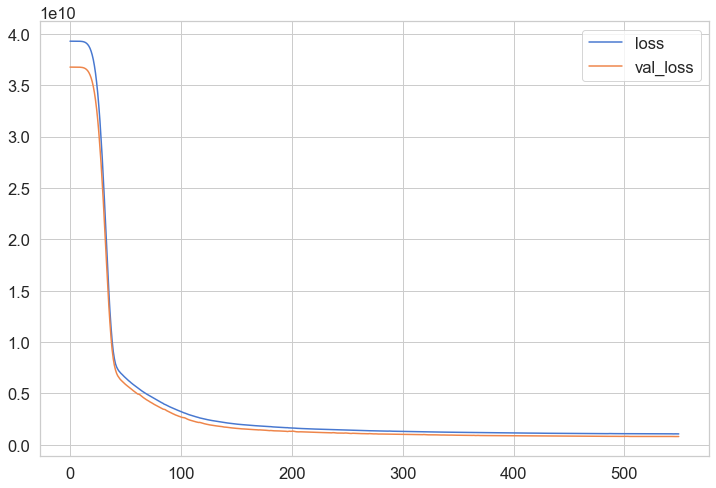

In [250]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [251]:
# Evaluation on Test Data

In [252]:
y1_pred = model.predict(X1_test)

In [253]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y1_test, y1_pred)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y1_test, y1_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y1_test,y1_pred)))

Mean Absolute Error: 20296.83
Mean Squared Error: 813060956.03
Root Mean Squared Error: 28514.22
Variance score is: 0.84


In [254]:
New_data1['SalePrice'].mean()

180921.19589041095

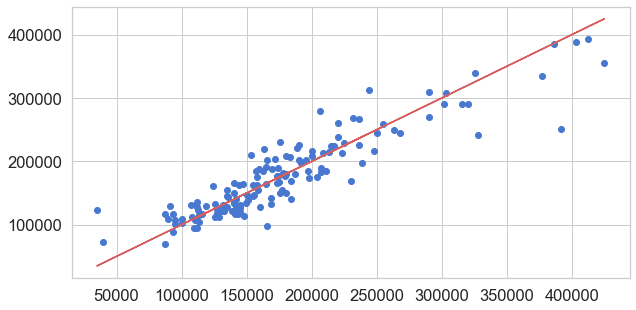

In [255]:
# Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y1_test,y1_pred)

# Perfect predictions
plt.plot(y1_test,y1_test,'r')

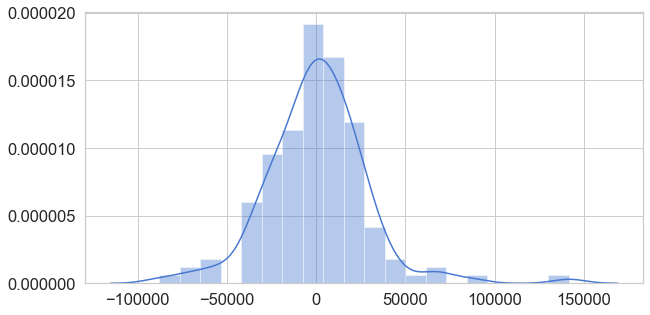

In [256]:
fig = plt.figure(figsize=(10,5))
residuals = (y1_test- y1_pred)
sns.distplot(residuals)

# Multiple Linear Regression vs Keras Regression

In [257]:
print('Model: Keras Regression\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y1_test, y1_pred)))
print('Mean Squared Error(MSE): {:.2f}'.format(metrics.mean_squared_error(y1_test, y1_pred)))
print('Root Mean Squared Error(RMSE): {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))))
print('Variance score: {:.2f}\n'.format(metrics.explained_variance_score(y1_test,y1_pred)*100))
print('*********************************\n')
print('Model: Multiple Linear Regression\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y1_test, y1_predd))) 
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y1_test, y1_predd)))  
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y1_test, y1_predd))))
print('Score: {:.2f}'.format(metrics.explained_variance_score(y1_test,y1_predd)*100))

Model: Keras Regression

Mean Absolute Error(MAE): 20296.83
Mean Squared Error(MSE): 813060956.03
Root Mean Squared Error(RMSE): 28514.22
Variance score: 83.98

*********************************

Model: Multiple Linear Regression

Mean Absolute Error(MAE): 21586.65
Mean Squared Error(MSE):848975941.36
Root Mean Squared Error(RMSE):29137.19
Score: 83.30


## 2nd Model Of Neural Network

In [258]:
# having 19 nueron is based on the number of available featurs

model2 = Sequential()
model2.add(Dense(19,activation='elu'))
model2.add(Dense(19,activation='elu'))
model2.add(Dense(19,activation='elu'))
model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))

model2.add(Dense(1))

model2.compile(optimizer='adam',loss='mse')

In [259]:
model2.fit(x=X1_train,y=y1_train,
          validation_data=(X1_test,y1_test),
          batch_size=128,epochs=600,)

Train on 1314 samples, validate on 146 samples
Epoch 1/600
1314/1314 [==============================] - 2s 1ms/sample - loss: 39291482598.2831 - val_loss: 36769167444.1644
Epoch 2/600
1314/1314 [==============================] - 0s 23us/sample - loss: 39291180971.8356 - val_loss: 36768864115.7260
Epoch 3/600
1314/1314 [==============================] - 0s 24us/sample - loss: 39290821920.3409 - val_loss: 36768457826.1918
Epoch 4/600
1314/1314 [==============================] - 0s 27us/sample - loss: 39290305615.4886 - val_loss: 36767827939.9452
Epoch 5/600
1314/1314 [==============================] - 0s 24us/sample - loss: 39289493931.0563 - val_loss: 36766858871.2329
Epoch 6/600
1314/1314 [==============================] - 0s 22us/sample - loss: 39288199021.4916 - val_loss: 36765322029.5890
Epoch 7/600
1314/1314 [==============================] - 0s 23us/sample - loss: 39286110142.5388 - val_loss: 36762908307.2877
Epoch 8/600
1314/1314 [==============================] - 0s 26us/sample 

1314/1314 [==============================] - 0s 21us/sample - loss: 9400776052.5053 - val_loss: 8751687932.4932
Epoch 66/600
1314/1314 [==============================] - 0s 20us/sample - loss: 9250952707.8965 - val_loss: 8608580081.9726
Epoch 67/600
1314/1314 [==============================] - 0s 21us/sample - loss: 9103957015.3790 - val_loss: 8488204007.4521
Epoch 68/600
1314/1314 [==============================] - 0s 20us/sample - loss: 8955049118.9772 - val_loss: 8335142280.7671
Epoch 69/600
1314/1314 [==============================] - 0s 21us/sample - loss: 8810095465.5951 - val_loss: 8194560519.0137
Epoch 70/600
1314/1314 [==============================] - 0s 20us/sample - loss: 8668194730.2770 - val_loss: 8052489777.0959
Epoch 71/600
1314/1314 [==============================] - 0s 19us/sample - loss: 8534769000.0365 - val_loss: 7920528313.8630
Epoch 72/600
1314/1314 [==============================] - 0s 21us/sample - loss: 8405802542.7580 - val_loss: 7792654532.3836
Epoch 73/600


Epoch 130/600
1314/1314 [==============================] - 0s 24us/sample - loss: 5278030357.4307 - val_loss: 4718785578.0822
Epoch 131/600
1314/1314 [==============================] - 0s 21us/sample - loss: 5244756613.2603 - val_loss: 4691751487.1233
Epoch 132/600
1314/1314 [==============================] - 0s 20us/sample - loss: 5213333200.8524 - val_loss: 4664335149.5890
Epoch 133/600
1314/1314 [==============================] - 0s 21us/sample - loss: 5176331471.2938 - val_loss: 4630499285.9178
Epoch 134/600
1314/1314 [==============================] - 0s 22us/sample - loss: 5150645829.3577 - val_loss: 4593185392.2192
Epoch 135/600
1314/1314 [==============================] - 0s 24us/sample - loss: 5100506549.5769 - val_loss: 4593604923.6164
Epoch 136/600
1314/1314 [==============================] - 0s 22us/sample - loss: 5073544802.9711 - val_loss: 4569809457.0959
Epoch 137/600
1314/1314 [==============================] - 0s 20us/sample - loss: 5040740232.3775 - val_loss: 45281130

1314/1314 [==============================] - 0s 22us/sample - loss: 2672317152.6332 - val_loss: 2146445634.6301
Epoch 196/600
1314/1314 [==============================] - 0s 21us/sample - loss: 2638094820.6271 - val_loss: 2109877142.7945
Epoch 197/600
1314/1314 [==============================] - 0s 19us/sample - loss: 2604277178.8371 - val_loss: 2080368948.6027
Epoch 198/600
1314/1314 [==============================] - 0s 19us/sample - loss: 2570117107.9209 - val_loss: 2049460555.3973
Epoch 199/600
1314/1314 [==============================] - 0s 22us/sample - loss: 2539946941.3699 - val_loss: 2018356269.5890
Epoch 200/600
1314/1314 [==============================] - 0s 20us/sample - loss: 2509552700.5906 - val_loss: 1989632445.3699
Epoch 201/600
1314/1314 [==============================] - 0s 21us/sample - loss: 2479074351.5373 - val_loss: 1955463567.7808
Epoch 202/600
1314/1314 [==============================] - 0s 19us/sample - loss: 2446283001.3760 - val_loss: 1922530510.9041
Epoch 

1314/1314 [==============================] - 0s 20us/sample - loss: 1504199158.6484 - val_loss: 1019434763.3973
Epoch 260/600
1314/1314 [==============================] - 0s 18us/sample - loss: 1492954725.8935 - val_loss: 1010498801.0959
Epoch 261/600
1314/1314 [==============================] - 0s 18us/sample - loss: 1488107019.5921 - val_loss: 1009622478.0274
Epoch 262/600
1314/1314 [==============================] - 0s 20us/sample - loss: 1477229876.6027 - val_loss: 1005028389.2603
Epoch 263/600
1314/1314 [==============================] - 0s 19us/sample - loss: 1470865710.5632 - val_loss: 995355502.4658
Epoch 264/600
1314/1314 [==============================] - 0s 20us/sample - loss: 1463329702.3805 - val_loss: 989058188.2740
Epoch 265/600
1314/1314 [==============================] - 0s 21us/sample - loss: 1458032413.4186 - val_loss: 981017193.2055
Epoch 266/600
1314/1314 [==============================] - 0s 20us/sample - loss: 1448651793.0472 - val_loss: 976049351.0137
Epoch 267/

1314/1314 [==============================] - 0s 26us/sample - loss: 1226545797.4551 - val_loss: 786010329.4247
Epoch 325/600
1314/1314 [==============================] - 0s 27us/sample - loss: 1224726372.3349 - val_loss: 781482868.1644
Epoch 326/600
1314/1314 [==============================] - 0s 27us/sample - loss: 1221232185.5708 - val_loss: 781317041.0959
Epoch 327/600
1314/1314 [==============================] - 0s 26us/sample - loss: 1220145830.3805 - val_loss: 780666936.1096
Epoch 328/600
1314/1314 [==============================] - 0s 28us/sample - loss: 1218791411.5312 - val_loss: 779407555.5068
Epoch 329/600
1314/1314 [==============================] - 0s 25us/sample - loss: 1215222088.9619 - val_loss: 775264274.6301
Epoch 330/600
1314/1314 [==============================] - 0s 25us/sample - loss: 1214998555.8113 - val_loss: 774298725.6986
Epoch 331/600
1314/1314 [==============================] - 0s 25us/sample - loss: 1213879076.1400 - val_loss: 775086101.0411
Epoch 332/600


1314/1314 [==============================] - 0s 21us/sample - loss: 1142276945.1446 - val_loss: 719411537.5342
Epoch 390/600
1314/1314 [==============================] - 0s 20us/sample - loss: 1142498405.9422 - val_loss: 721861258.5205
Epoch 391/600
1314/1314 [==============================] - 0s 21us/sample - loss: 1139552724.8463 - val_loss: 720233614.0274
Epoch 392/600
1314/1314 [==============================] - 0s 21us/sample - loss: 1140261015.9635 - val_loss: 718334729.6438
Epoch 393/600
1314/1314 [==============================] - 0s 21us/sample - loss: 1133395253.1872 - val_loss: 719275359.5616
Epoch 394/600
1314/1314 [==============================] - 0s 23us/sample - loss: 1135914267.6651 - val_loss: 719957413.2603
Epoch 395/600
1314/1314 [==============================] - 0s 22us/sample - loss: 1134969506.0944 - val_loss: 723957450.0822
Epoch 396/600
1314/1314 [==============================] - 0s 21us/sample - loss: 1137651240.5236 - val_loss: 722223509.9178
Epoch 397/600


1314/1314 [==============================] - 0s 20us/sample - loss: 1101627300.9193 - val_loss: 711117043.7260
Epoch 455/600
1314/1314 [==============================] - 0s 21us/sample - loss: 1100136956.8828 - val_loss: 710567778.1918
Epoch 456/600
1314/1314 [==============================] - 0s 20us/sample - loss: 1100004808.8645 - val_loss: 707121027.0685
Epoch 457/600
1314/1314 [==============================] - 0s 20us/sample - loss: 1099455953.8752 - val_loss: 707902802.4110
Epoch 458/600
1314/1314 [==============================] - 0s 22us/sample - loss: 1097943359.6104 - val_loss: 707799868.4932
Epoch 459/600
1314/1314 [==============================] - 0s 21us/sample - loss: 1098127444.8463 - val_loss: 708747239.4521
Epoch 460/600
1314/1314 [==============================] - 0s 20us/sample - loss: 1097090967.5738 - val_loss: 708976794.3014
Epoch 461/600
1314/1314 [==============================] - 0s 20us/sample - loss: 1099419179.4460 - val_loss: 708297084.4932
Epoch 462/600


Epoch 519/600
1314/1314 [==============================] - 0s 23us/sample - loss: 1075295560.8645 - val_loss: 710626372.3836
Epoch 520/600
1314/1314 [==============================] - 0s 21us/sample - loss: 1080963219.8721 - val_loss: 710483643.6164
Epoch 521/600
1314/1314 [==============================] - 0s 19us/sample - loss: 1080176605.8569 - val_loss: 709374005.4795
Epoch 522/600
1314/1314 [==============================] - 0s 21us/sample - loss: 1077010440.0365 - val_loss: 710732009.2055
Epoch 523/600
1314/1314 [==============================] - 0s 21us/sample - loss: 1076584184.4018 - val_loss: 715337145.8630
Epoch 524/600
1314/1314 [==============================] - 0s 21us/sample - loss: 1074383040.2922 - val_loss: 713556767.5616
Epoch 525/600
1314/1314 [==============================] - 0s 21us/sample - loss: 1074041151.1233 - val_loss: 711169422.9041
Epoch 526/600
1314/1314 [==============================] - 0s 23us/sample - loss: 1077074841.9117 - val_loss: 711319569.5342


1314/1314 [==============================] - 0s 24us/sample - loss: 1058834515.9696 - val_loss: 706672299.3973
Epoch 585/600
1314/1314 [==============================] - 0s 22us/sample - loss: 1058655654.7215 - val_loss: 705588539.1781
Epoch 586/600
1314/1314 [==============================] - 0s 19us/sample - loss: 1057976345.1811 - val_loss: 705425265.0959
Epoch 587/600
1314/1314 [==============================] - 0s 19us/sample - loss: 1057340305.7778 - val_loss: 706160353.3151
Epoch 588/600
1314/1314 [==============================] - 0s 20us/sample - loss: 1057968764.5906 - val_loss: 706576493.5890
Epoch 589/600
1314/1314 [==============================] - 0s 19us/sample - loss: 1058302534.4292 - val_loss: 706523139.5068
Epoch 590/600
1314/1314 [==============================] - 0s 24us/sample - loss: 1057005704.3775 - val_loss: 708020491.3973
Epoch 591/600
1314/1314 [==============================] - 0s 26us/sample - loss: 1057877676.9072 - val_loss: 705974622.6849
Epoch 592/600


In [260]:
model2.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_130 (Dense)            multiple                  418       
_________________________________________________________________
dense_131 (Dense)            multiple                  380       
_________________________________________________________________
dense_132 (Dense)            multiple                  380       
_________________________________________________________________
dense_133 (Dense)            multiple                  380       
_________________________________________________________________
dense_134 (Dense)            multiple                  20        
Total params: 1,578
Trainable params: 1,578
Non-trainable params: 0
_________________________________________________________________


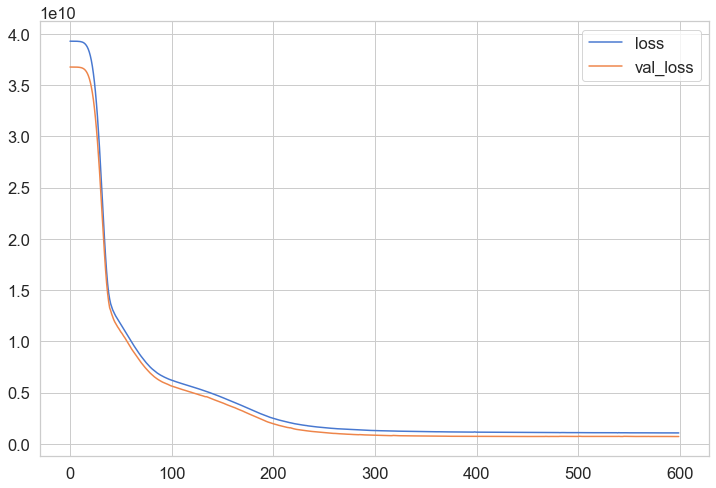

In [261]:
loss_df = pd.DataFrame(model2.history.history)
loss_df.plot(figsize=(12,8))

In [262]:
y1_predict = model2.predict(X1_test)

In [263]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y1_test, y1_predict)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y1_test, y1_predict)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y1_test, y1_predict))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y1_test,y1_predict)))

Mean Absolute Error: 19097.02
Mean Squared Error: 704780394.20
Root Mean Squared Error: 26547.70
Variance score is: 0.86


### 3rd Model of Neural Network

In [264]:
model3 = Sequential()

model3.add(Dense(19,activation='selu'))
model3.add(Dense(19,activation='selu'))
model3.add(Dense(19,activation='selu'))
model3.add(Dense(19,activation='selu'))
#model3.add(Dense(19,activation='selu'))
#model3.add(Dense(9,activation='selu'))
#model3.add(Dense(9,activation='selu'))
#model3.add(Dense(9,activation='selu'))
#model3.add(Dense(9,activation='selu'))
model3.add(Dense(1))

model3.compile(optimizer='adam',loss='mse')

In [265]:
model3.fit(x=X1_train,y=y1_train,
          validation_data=(X1_test,y1_test),
          batch_size=128,epochs=650,)

Train on 1314 samples, validate on 146 samples
Epoch 1/650
1314/1314 [==============================] - 2s 1ms/sample - loss: 39291420110.9041 - val_loss: 36769123398.1370
Epoch 2/650
1314/1314 [==============================] - 0s 29us/sample - loss: 39291098615.4277 - val_loss: 36768797429.4795
Epoch 3/650
1314/1314 [==============================] - 0s 30us/sample - loss: 39290665168.8524 - val_loss: 36768318001.0959
Epoch 4/650
1314/1314 [==============================] - 0s 27us/sample - loss: 39290019565.6865 - val_loss: 36767564589.5890
Epoch 5/650
1314/1314 [==============================] - 0s 27us/sample - loss: 39289027535.6834 - val_loss: 36766400960.8767
Epoch 6/650
1314/1314 [==============================] - 0s 30us/sample - loss: 39287452745.2542 - val_loss: 36764583739.6164
Epoch 7/650
1314/1314 [==============================] - 0s 28us/sample - loss: 39285045307.2268 - val_loss: 36761727873.7534
Epoch 8/650
1314/1314 [==============================] - 0s 26us/sample 

1314/1314 [==============================] - 0s 25us/sample - loss: 7061444217.5708 - val_loss: 6580946326.7945
Epoch 66/650
1314/1314 [==============================] - 0s 25us/sample - loss: 7012180633.5221 - val_loss: 6528930016.4384
Epoch 67/650
1314/1314 [==============================] - 0s 25us/sample - loss: 6969936541.4186 - val_loss: 6486301429.4795
Epoch 68/650
1314/1314 [==============================] - 0s 26us/sample - loss: 6914175954.8006 - val_loss: 6431962083.9452
Epoch 69/650
1314/1314 [==============================] - 0s 24us/sample - loss: 6871256327.4033 - val_loss: 6395602088.3288
Epoch 70/650
1314/1314 [==============================] - 0s 22us/sample - loss: 6818391225.0837 - val_loss: 6350616618.0822
Epoch 71/650
1314/1314 [==============================] - 0s 23us/sample - loss: 6773337655.3303 - val_loss: 6305961991.0137
Epoch 72/650
1314/1314 [==============================] - 0s 25us/sample - loss: 6730045116.2009 - val_loss: 6260417206.3562
Epoch 73/650


Epoch 130/650
1314/1314 [==============================] - 0s 30us/sample - loss: 5227521857.0715 - val_loss: 4579667231.5616
Epoch 131/650
1314/1314 [==============================] - 0s 30us/sample - loss: 5209988124.0548 - val_loss: 4562927458.1918
Epoch 132/650
1314/1314 [==============================] - 0s 28us/sample - loss: 5195394597.4064 - val_loss: 4546101605.6986
Epoch 133/650
1314/1314 [==============================] - 0s 28us/sample - loss: 5180492357.3577 - val_loss: 4529332595.7260
Epoch 134/650
1314/1314 [==============================] - 0s 30us/sample - loss: 5164066235.4216 - val_loss: 4508958208.0000
Epoch 135/650
1314/1314 [==============================] - 0s 29us/sample - loss: 5151448874.4718 - val_loss: 4490209143.2329
Epoch 136/650
1314/1314 [==============================] - ETA: 0s - loss: 4539754496.00 - 0s 27us/sample - loss: 5132180294.1370 - val_loss: 4479636886.7945
Epoch 137/650
1314/1314 [==============================] - 0s 24us/sample - loss: 5119

Epoch 195/650
1314/1314 [==============================] - 0s 37us/sample - loss: 4290420588.3227 - val_loss: 3794559645.8082
Epoch 196/650
1314/1314 [==============================] - 0s 26us/sample - loss: 4276782648.8889 - val_loss: 3788064248.9863
Epoch 197/650
1314/1314 [==============================] - 0s 23us/sample - loss: 4260610991.7321 - val_loss: 3775610315.3973
Epoch 198/650
1314/1314 [==============================] - 0s 22us/sample - loss: 4244539836.2009 - val_loss: 3760297759.5616
Epoch 199/650
1314/1314 [==============================] - 0s 24us/sample - loss: 4231101875.6286 - val_loss: 3745830792.7671
Epoch 200/650
1314/1314 [==============================] - 0s 27us/sample - loss: 4216927214.0761 - val_loss: 3731673936.6575
Epoch 201/650
1314/1314 [==============================] - 0s 27us/sample - loss: 4203846768.2192 - val_loss: 3721703869.3699
Epoch 202/650
1314/1314 [==============================] - 0s 22us/sample - loss: 4187461601.9970 - val_loss: 37095479

1314/1314 [==============================] - 0s 30us/sample - loss: 3424516237.8326 - val_loss: 3113177217.7534
Epoch 260/650
1314/1314 [==============================] - 0s 33us/sample - loss: 3410311214.7580 - val_loss: 3113238151.0137
Epoch 261/650
1314/1314 [==============================] - 0s 26us/sample - loss: 3401284445.1263 - val_loss: 3102125715.2877
Epoch 262/650
1314/1314 [==============================] - 0s 21us/sample - loss: 3388481057.8995 - val_loss: 3086459392.0000
Epoch 263/650
1314/1314 [==============================] - 0s 25us/sample - loss: 3378734189.1020 - val_loss: 3074658644.1644
Epoch 264/650
1314/1314 [==============================] - 0s 25us/sample - loss: 3366084433.4368 - val_loss: 3065740435.2877
Epoch 265/650
1314/1314 [==============================] - 0s 25us/sample - loss: 3352083700.5053 - val_loss: 3052466304.0000
Epoch 266/650
1314/1314 [==============================] - 0s 22us/sample - loss: 3342304301.7839 - val_loss: 3034255388.0548
Epoch 

1314/1314 [==============================] - 0s 24us/sample - loss: 2725209790.9285 - val_loss: 2468460207.3425
Epoch 325/650
1314/1314 [==============================] - 0s 24us/sample - loss: 2718360007.5008 - val_loss: 2482990251.8356
Epoch 326/650
1314/1314 [==============================] - 0s 26us/sample - loss: 2704982862.3196 - val_loss: 2475638629.6986
Epoch 327/650
1314/1314 [==============================] - 0s 24us/sample - loss: 2695776773.4551 - val_loss: 2477276571.1781
Epoch 328/650
1314/1314 [==============================] - 0s 25us/sample - loss: 2694664344.7428 - val_loss: 2466728754.8493
Epoch 329/650
1314/1314 [==============================] - 0s 24us/sample - loss: 2682338532.1400 - val_loss: 2450777382.5753
Epoch 330/650
1314/1314 [==============================] - 0s 26us/sample - loss: 2670843305.8874 - val_loss: 2432254330.7397
Epoch 331/650
1314/1314 [==============================] - 0s 25us/sample - loss: 2670283218.4110 - val_loss: 2417838684.9315
Epoch 

Epoch 389/650
1314/1314 [==============================] - 0s 25us/sample - loss: 2362578806.8432 - val_loss: 2090686250.0822
Epoch 390/650
1314/1314 [==============================] - 0s 23us/sample - loss: 2357229707.2998 - val_loss: 2088043141.2603
Epoch 391/650
1314/1314 [==============================] - 0s 24us/sample - loss: 2352086572.0304 - val_loss: 2081309625.8630
Epoch 392/650
1314/1314 [==============================] - 0s 25us/sample - loss: 2351404240.8524 - val_loss: 2080719863.2329
Epoch 393/650
1314/1314 [==============================] - 0s 24us/sample - loss: 2345014250.1796 - val_loss: 2079295060.1644
Epoch 394/650
1314/1314 [==============================] - 0s 24us/sample - loss: 2338504038.2831 - val_loss: 2071412918.3562
Epoch 395/650
1314/1314 [==============================] - 0s 24us/sample - loss: 2332901159.1598 - val_loss: 2065484115.2877
Epoch 396/650
1314/1314 [==============================] - 0s 24us/sample - loss: 2334761783.9148 - val_loss: 20623307

Epoch 454/650
1314/1314 [==============================] - 0s 27us/sample - loss: 2077573259.4947 - val_loss: 1845258962.4110
Epoch 455/650
1314/1314 [==============================] - 0s 24us/sample - loss: 2073255639.0868 - val_loss: 1844312206.0274
Epoch 456/650
1314/1314 [==============================] - 0s 37us/sample - loss: 2068761213.8569 - val_loss: 1841620339.7260
Epoch 457/650
1314/1314 [==============================] - 0s 22us/sample - loss: 2065165351.7443 - val_loss: 1840243578.7397
Epoch 458/650
1314/1314 [==============================] - 0s 24us/sample - loss: 2060578804.1157 - val_loss: 1838641118.6849
Epoch 459/650
1314/1314 [==============================] - 0s 24us/sample - loss: 2057601874.9954 - val_loss: 1834205285.2603
Epoch 460/650
1314/1314 [==============================] - 0s 24us/sample - loss: 2051801555.1903 - val_loss: 1835114448.6575
Epoch 461/650
1314/1314 [==============================] - 0s 25us/sample - loss: 2052595097.9117 - val_loss: 18380681

1314/1314 [==============================] - 0s 26us/sample - loss: 1855296457.5464 - val_loss: 1704652207.3425
Epoch 520/650
1314/1314 [==============================] - 0s 25us/sample - loss: 1850238546.0213 - val_loss: 1703946702.9041
Epoch 521/650
1314/1314 [==============================] - 0s 25us/sample - loss: 1845671526.0883 - val_loss: 1700847375.7808
Epoch 522/650
1314/1314 [==============================] - 0s 24us/sample - loss: 1842448541.8569 - val_loss: 1707033140.6027
Epoch 523/650
1314/1314 [==============================] - 0s 23us/sample - loss: 1839082370.5327 - val_loss: 1706820634.3014
Epoch 524/650
1314/1314 [==============================] - 0s 22us/sample - loss: 1836656827.4703 - val_loss: 1703245033.2055
Epoch 525/650
1314/1314 [==============================] - 0s 25us/sample - loss: 1836658902.2100 - val_loss: 1702846043.1781
Epoch 526/650
1314/1314 [==============================] - 0s 27us/sample - loss: 1832888235.0563 - val_loss: 1701619333.2603
Epoch 

1314/1314 [==============================] - 0s 25us/sample - loss: 1704352395.1050 - val_loss: 1618632245.4795
Epoch 584/650
1314/1314 [==============================] - 0s 26us/sample - loss: 1702638452.3105 - val_loss: 1613849363.2877
Epoch 585/650
1314/1314 [==============================] - 0s 24us/sample - loss: 1703308416.5845 - val_loss: 1611477453.1507
Epoch 586/650
1314/1314 [==============================] - 0s 25us/sample - loss: 1699949447.0137 - val_loss: 1608138189.1507
Epoch 587/650
1314/1314 [==============================] - 0s 26us/sample - loss: 1698106112.0000 - val_loss: 1610652939.3973
Epoch 588/650
1314/1314 [==============================] - 0s 24us/sample - loss: 1696257935.1963 - val_loss: 1605883960.1096
Epoch 589/650
1314/1314 [==============================] - 0s 24us/sample - loss: 1694250163.4338 - val_loss: 1602783295.1233
Epoch 590/650
1314/1314 [==============================] - 0s 24us/sample - loss: 1693184693.3820 - val_loss: 1604547133.3699
Epoch 

1314/1314 [==============================] - 0s 25us/sample - loss: 1596889389.9787 - val_loss: 1551621174.3562
Epoch 648/650
1314/1314 [==============================] - 0s 22us/sample - loss: 1596666863.2451 - val_loss: 1549031034.7397
Epoch 649/650
1314/1314 [==============================] - 0s 26us/sample - loss: 1593768050.5571 - val_loss: 1550515804.9315
Epoch 650/650
1314/1314 [==============================] - 0s 26us/sample - loss: 1596180044.6636 - val_loss: 1551625566.6849


In [266]:
model3.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_135 (Dense)            multiple                  418       
_________________________________________________________________
dense_136 (Dense)            multiple                  380       
_________________________________________________________________
dense_137 (Dense)            multiple                  380       
_________________________________________________________________
dense_138 (Dense)            multiple                  380       
_________________________________________________________________
dense_139 (Dense)            multiple                  20        
Total params: 1,578
Trainable params: 1,578
Non-trainable params: 0
_________________________________________________________________


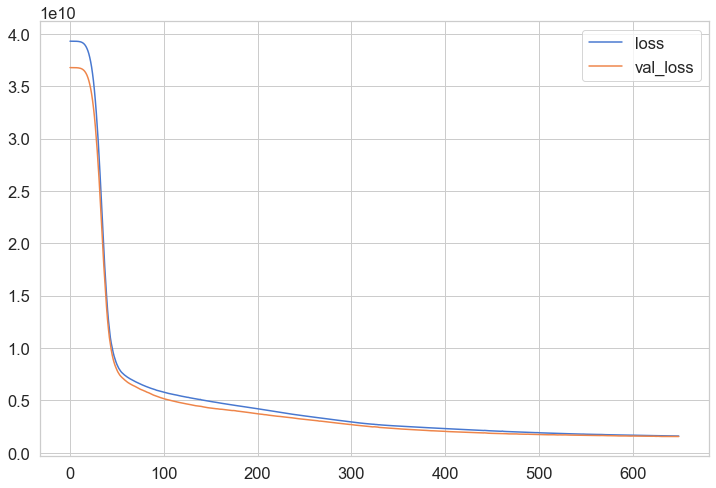

In [267]:
loss_df = pd.DataFrame(model3.history.history)
loss_df.plot(figsize=(12,8))

In [268]:
y3_predict = model3.predict(X1_test)

In [269]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y1_test, y3_predict)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y1_test, y3_predict)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y1_test, y3_predict))))
print('Variance Score is: {:.2f}'.format(metrics.explained_variance_score(y1_test,y3_predict)))

Mean Absolute Error: 25979.77
Mean Squared Error: 1551625770.00
Root Mean Squared Error: 39390.68
Variance Score is: 0.70


## 4th Model Neural Network

In [61]:
model4 = Sequential()

model4.add(Dense(21,activation='selu'))
model4.add(Dense(19,activation='elu'))
model4.add(Dense(10,activation='relu'))
model4.add(Dense(28,activation='elu'))
model4.add(Dense(10,activation='relu'))
model4.add(Dense(30,activation='selu'))
#model4.add(Dense(12,activation='elu'))
#model4.add(Dense(11,activation='relu'))
#model4.add(Dense(14,activation='selu'))
#model4.add(Dense(7,activation='selu'))
#model4.add(Dense(9,activation='elu'))

model4.add(Dense(1))

model4.compile(optimizer='adam',loss='mse')

In [62]:
model4.fit(x=X1_train,y=y1_train,
          validation_data=(X1_test,y1_test),
          batch_size=128,epochs=500,)

Train on 1314 samples, validate on 146 samples
Epoch 1/300
1314/1314 [==============================] - 0s 359us/sample - loss: 39291344525.0533 - val_loss: 36769067849.6438
Epoch 2/300
1314/1314 [==============================] - 0s 21us/sample - loss: 39291061682.8493 - val_loss: 36768715761.9726
Epoch 3/300
1314/1314 [==============================] - 0s 23us/sample - loss: 39290584657.8265 - val_loss: 36768117297.0959
Epoch 4/300
1314/1314 [==============================] - 0s 22us/sample - loss: 39289817159.6956 - val_loss: 36767200718.9041
Epoch 5/300
1314/1314 [==============================] - 0s 24us/sample - loss: 39288608549.7960 - val_loss: 36765744590.9041
Epoch 6/300
1314/1314 [==============================] - 0s 24us/sample - loss: 39286672934.1857 - val_loss: 36763342314.9589
Epoch 7/300
1314/1314 [==============================] - 0s 24us/sample - loss: 39283352138.0335 - val_loss: 36759108117.0411
Epoch 8/300
1314/1314 [==============================] - 0s 21us/sampl

Epoch 66/300
1314/1314 [==============================] - 0s 17us/sample - loss: 4139914333.1263 - val_loss: 3638102240.4384
Epoch 67/300
1314/1314 [==============================] - 0s 18us/sample - loss: 4101306696.6697 - val_loss: 3576470948.8219
Epoch 68/300
1314/1314 [==============================] - 0s 18us/sample - loss: 4048747027.4825 - val_loss: 3538111516.0548
Epoch 69/300
1314/1314 [==============================] - 0s 18us/sample - loss: 3996887711.7565 - val_loss: 3485909535.5616
Epoch 70/300
1314/1314 [==============================] - 0s 18us/sample - loss: 3950495065.2298 - val_loss: 3445868708.8219
Epoch 71/300
1314/1314 [==============================] - 0s 17us/sample - loss: 3894534849.6560 - val_loss: 3382249991.0137
Epoch 72/300
1314/1314 [==============================] - 0s 16us/sample - loss: 3844339756.4201 - val_loss: 3327797409.3151
Epoch 73/300
1314/1314 [==============================] - 0s 17us/sample - loss: 3792038671.1963 - val_loss: 3280248337.5342


1314/1314 [==============================] - 0s 19us/sample - loss: 1746538514.5084 - val_loss: 1343103106.6301
Epoch 132/300
1314/1314 [==============================] - 0s 19us/sample - loss: 1735932709.7960 - val_loss: 1332566697.2055
Epoch 133/300
1314/1314 [==============================] - 0s 18us/sample - loss: 1724525599.9513 - val_loss: 1344934773.4795
Epoch 134/300
1314/1314 [==============================] - 0s 18us/sample - loss: 1722604565.8204 - val_loss: 1316282503.8904
Epoch 135/300
1314/1314 [==============================] - 0s 19us/sample - loss: 1722502957.7839 - val_loss: 1320554048.0000
Epoch 136/300
1314/1314 [==============================] - 0s 21us/sample - loss: 1700790594.8250 - val_loss: 1286851216.6575
Epoch 137/300
1314/1314 [==============================] - 0s 19us/sample - loss: 1676619008.6819 - val_loss: 1271220450.1918
Epoch 138/300
1314/1314 [==============================] - 0s 18us/sample - loss: 1668721020.1035 - val_loss: 1259490716.0548
Epoch 

1314/1314 [==============================] - 0s 28us/sample - loss: 1297177476.0913 - val_loss: 795321611.8356
Epoch 196/300
1314/1314 [==============================] - 0s 17us/sample - loss: 1289829172.1157 - val_loss: 792599748.3836
Epoch 197/300
1314/1314 [==============================] - 0s 17us/sample - loss: 1283930122.3257 - val_loss: 788653094.5753
Epoch 198/300
1314/1314 [==============================] - 0s 19us/sample - loss: 1283662742.7945 - val_loss: 785699976.7671
Epoch 199/300
1314/1314 [==============================] - 0s 15us/sample - loss: 1291405643.5921 - val_loss: 781384830.2466
Epoch 200/300
1314/1314 [==============================] - 0s 17us/sample - loss: 1270259171.0198 - val_loss: 780752655.7808
Epoch 201/300
1314/1314 [==============================] - 0s 17us/sample - loss: 1272694960.0244 - val_loss: 778328870.5753
Epoch 202/300
1314/1314 [==============================] - 0s 16us/sample - loss: 1266553432.7428 - val_loss: 775434416.2192
Epoch 203/300


1314/1314 [==============================] - 0s 18us/sample - loss: 1188419552.0974 - val_loss: 691746550.7945
Epoch 261/300
1314/1314 [==============================] - 0s 18us/sample - loss: 1179415521.7047 - val_loss: 689091727.7808
Epoch 262/300
1314/1314 [==============================] - 0s 18us/sample - loss: 1175849661.5647 - val_loss: 689440923.1781
Epoch 263/300
1314/1314 [==============================] - 0s 17us/sample - loss: 1181766770.1674 - val_loss: 686681961.2055
Epoch 264/300
1314/1314 [==============================] - 0s 18us/sample - loss: 1175150068.1644 - val_loss: 686658965.0411
Epoch 265/300
1314/1314 [==============================] - 0s 18us/sample - loss: 1178682351.6347 - val_loss: 684623596.7123
Epoch 266/300
1314/1314 [==============================] - 0s 18us/sample - loss: 1171038183.5495 - val_loss: 685323678.0274
Epoch 267/300
1314/1314 [==============================] - 0s 16us/sample - loss: 1176259621.0167 - val_loss: 683191760.4384
Epoch 268/300


In [63]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             multiple                  462       
_________________________________________________________________
dense_16 (Dense)             multiple                  418       
_________________________________________________________________
dense_17 (Dense)             multiple                  200       
_________________________________________________________________
dense_18 (Dense)             multiple                  308       
_________________________________________________________________
dense_19 (Dense)             multiple                  290       
_________________________________________________________________
dense_20 (Dense)             multiple                  330       
_________________________________________________________________
dense_21 (Dense)             multiple                 

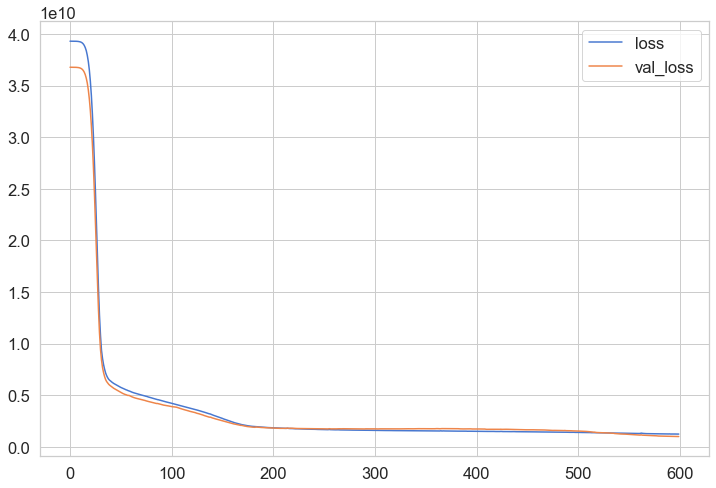

In [64]:
loss_df = pd.DataFrame(model3.history.history)
loss_df.plot(figsize=(12,8))

In [65]:
y4_predict = model4.predict(X1_test)

In [66]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y1_test, y4_predict)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y1_test, y4_predict)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y1_test, y4_predict))))
print('Score is: {:.2f}'.format(metrics.explained_variance_score(y1_test,y4_predict)))

Mean Absolute Error: 18677.66
Mean Squared Error: 681183402.05
Root Mean Squared Error: 26099.49
Score is: 0.87


# Selection of attributes with correlation  >50%

In [67]:
#df_train['YearRemodAdd']

In [68]:
#SalePrice        1.000000
#OverallQual      0.790982
#GrLivArea        0.708624
#GarageCars       0.640409
#GarageArea       0.623431
#TotalBsmtSF      0.613581
#1stFlrSF         0.605852
#FullBath         0.560664
#TotRmsAbvGrd     0.533723
#YearBuilt        0.522897
#YearRemodAdd     0.507101

In [69]:
New_data = df_train[['YearBuilt','2ndFlrSF','GrLivArea','FullBath','OverallQual','1stFlrSF','GarageCars','GarageArea','BedroomAbvGr','TotalBsmtSF','TotRmsAbvGrd','YearRemodAdd','SalePrice']]
X = New_data.drop(columns=['SalePrice'])
Y = New_data[['SalePrice']]


#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=101)

In [70]:
#New_data.isnull().sum()

# Feature Scalling

In [71]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

# Method1: Multiple Linear Regression

In [72]:
#Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#evaluate the model (intercept and slope)
regressor.intercept_
regressor.coef_

array([[ 7237.15482294, 17195.05801124,  7175.50588066, -2662.43157388,
        26115.56744094, 19793.64777753,  8502.58014613,  2128.32730116,
        -6969.06093077,  9070.15803518,  5176.50595989,  5369.57692305]])

In [73]:
y_predd = regressor.predict(X_test)
data = pd.DataFrame()
data['Actual'] = list(y_test['SalePrice'])
data['Predicted'] = y_predd
data

,Actual,Predicted
0,255000,255319.234393
1,145000,141610.283360
2,150500,135875.430764
3,412500,348852.435250
4,402861,348795.328654
...,...,...
141,184000,187106.095063
142,95000,93057.416306
143,112500,99896.937737
144,163000,196664.615458


In [74]:
# y_predd = regressor.predict(X_test)
# df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predd})
# df1 = df.head(10)
# df1
#data['Predicted'] = y_predd

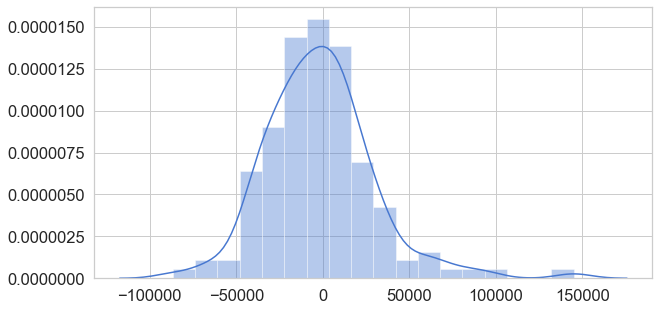

In [75]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_predd)
sns.distplot(residuals)

In [76]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)))

Mean Absolute Error: 23208.65
Mean Squared Error:984141394.09
Root Mean Squared Error:31371.03
Variance score is: 0.81


In [77]:
New_data['SalePrice'].mean()

180921.19589041095

In [78]:
print('Linear Regression Model:')
print("Train Score {:.2f}".format(regressor.score(X_train,y_train)))
print("Test Score {:.2f}".format(regressor.score(X_test, y_test)))

Linear Regression Model:
Train Score 0.78
Test Score 0.81


# Method2: Keras Regression

In [79]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [276]:
# having 19 nueron is based on the number of available featurs

model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
#model.add(Dense(19,activation='relu'))
#model.add(Dense(19,activation='relu'))
#model.add(Dense(19,activation='relu'))
#model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

# Training the Model

In [277]:
y_train = np.array(y_train)


In [278]:
#model.fit(X_train, y_train, epochs=500, callbacks=[keras.callbacks.EarlyStopping(patience=3)])


model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=650,)

Train on 1314 samples, validate on 146 samples
Epoch 1/650
1314/1314 [==============================] - 2s 1ms/sample - loss: 39291509325.1507 - val_loss: 36769290773.0411
Epoch 2/650
1314/1314 [==============================] - 0s 24us/sample - loss: 39291417573.5038 - val_loss: 36769205290.0822
Epoch 3/650
1314/1314 [==============================] - 0s 26us/sample - loss: 39291293272.0609 - val_loss: 36769052812.2740
Epoch 4/650
1314/1314 [==============================] - 0s 28us/sample - loss: 39291067175.3546 - val_loss: 36768755824.2192
Epoch 5/650
1314/1314 [==============================] - 0s 24us/sample - loss: 39290623432.6697 - val_loss: 36768122964.1644
Epoch 6/650
1314/1314 [==============================] - 0s 22us/sample - loss: 39289640501.7717 - val_loss: 36766810392.5479
Epoch 7/650
1314/1314 [==============================] - 0s 22us/sample - loss: 39287586223.7321 - val_loss: 36764074096.2192
Epoch 8/650
1314/1314 [==============================] - 0s 24us/sample 

1314/1314 [==============================] - 0s 22us/sample - loss: 3182239393.5099 - val_loss: 2671274969.4247
Epoch 66/650
1314/1314 [==============================] - 0s 20us/sample - loss: 3123847449.1324 - val_loss: 2604948583.4521
Epoch 67/650
1314/1314 [==============================] - 0s 21us/sample - loss: 3066877246.5388 - val_loss: 2555130164.6027
Epoch 68/650
1314/1314 [==============================] - 0s 21us/sample - loss: 3009374099.4825 - val_loss: 2495367760.6575
Epoch 69/650
1314/1314 [==============================] - 0s 19us/sample - loss: 2964620088.1096 - val_loss: 2447724522.9589
Epoch 70/650
1314/1314 [==============================] - 0s 20us/sample - loss: 2904316578.2892 - val_loss: 2390976466.4110
Epoch 71/650
1314/1314 [==============================] - 0s 20us/sample - loss: 2854984212.4566 - val_loss: 2328799526.5753
Epoch 72/650
1314/1314 [==============================] - 0s 20us/sample - loss: 2809828769.7047 - val_loss: 2267560944.2192
Epoch 73/650


1314/1314 [==============================] - 0s 25us/sample - loss: 1669229783.4764 - val_loss: 1065329255.4521
Epoch 131/650
1314/1314 [==============================] - 0s 23us/sample - loss: 1658111660.3227 - val_loss: 1069192436.6027
Epoch 132/650
1314/1314 [==============================] - 0s 21us/sample - loss: 1649476587.7382 - val_loss: 1053271092.6027
Epoch 133/650
1314/1314 [==============================] - 0s 20us/sample - loss: 1639359856.6088 - val_loss: 1068296064.8767
Epoch 134/650
1314/1314 [==============================] - 0s 21us/sample - loss: 1629915641.8630 - val_loss: 1043781596.9315
Epoch 135/650
1314/1314 [==============================] - 0s 20us/sample - loss: 1617530848.0487 - val_loss: 1023864351.5616
Epoch 136/650
1314/1314 [==============================] - 0s 22us/sample - loss: 1612391731.2390 - val_loss: 1009974821.6986
Epoch 137/650
1314/1314 [==============================] - 0s 21us/sample - loss: 1603185706.2770 - val_loss: 1006150165.0411
Epoch 

1314/1314 [==============================] - 0s 21us/sample - loss: 1385946740.3105 - val_loss: 829496219.1781
Epoch 196/650
1314/1314 [==============================] - 0s 23us/sample - loss: 1373872225.4125 - val_loss: 832911970.1918
Epoch 197/650
1314/1314 [==============================] - 0s 21us/sample - loss: 1369280385.5586 - val_loss: 834802487.2329
Epoch 198/650
1314/1314 [==============================] - 0s 23us/sample - loss: 1370252857.7656 - val_loss: 832477997.5890
Epoch 199/650
1314/1314 [==============================] - 0s 23us/sample - loss: 1369315903.6104 - val_loss: 835622633.2055
Epoch 200/650
1314/1314 [==============================] - 0s 30us/sample - loss: 1363016597.4307 - val_loss: 828737426.8493
Epoch 201/650
1314/1314 [==============================] - 0s 25us/sample - loss: 1369254888.6210 - val_loss: 824525781.9178
Epoch 202/650
1314/1314 [==============================] - 0s 23us/sample - loss: 1364227346.3135 - val_loss: 825028160.8767
Epoch 203/650


1314/1314 [==============================] - 0s 23us/sample - loss: 1290386226.6545 - val_loss: 796238449.9726
Epoch 261/650
1314/1314 [==============================] - 0s 21us/sample - loss: 1289426840.4992 - val_loss: 798276644.8219
Epoch 262/650
1314/1314 [==============================] - 0s 21us/sample - loss: 1288600364.0304 - val_loss: 800441226.5205
Epoch 263/650
1314/1314 [==============================] - 0s 22us/sample - loss: 1297129081.3760 - val_loss: 804033506.1918
Epoch 264/650
1314/1314 [==============================] - 0s 21us/sample - loss: 1286113102.2222 - val_loss: 796099194.7397
Epoch 265/650
1314/1314 [==============================] - 0s 21us/sample - loss: 1290986485.8691 - val_loss: 795168540.0548
Epoch 266/650
1314/1314 [==============================] - 0s 31us/sample - loss: 1286917365.9665 - val_loss: 798546659.0685
Epoch 267/650
1314/1314 [==============================] - 0s 23us/sample - loss: 1286796515.7504 - val_loss: 797080827.6164
Epoch 268/650


1314/1314 [==============================] - 0s 21us/sample - loss: 1260228308.9437 - val_loss: 789275708.4932
Epoch 326/650
1314/1314 [==============================] - 0s 21us/sample - loss: 1259932874.9102 - val_loss: 787602357.4795
Epoch 327/650
1314/1314 [==============================] - 0s 23us/sample - loss: 1261481441.8995 - val_loss: 786984844.2740
Epoch 328/650
1314/1314 [==============================] - 0s 22us/sample - loss: 1258416527.3912 - val_loss: 788684702.6849
Epoch 329/650
1314/1314 [==============================] - 0s 22us/sample - loss: 1259559461.6012 - val_loss: 791208191.7808
Epoch 330/650
1314/1314 [==============================] - 0s 21us/sample - loss: 1255571923.1903 - val_loss: 789958312.7671
Epoch 331/650
1314/1314 [==============================] - 0s 23us/sample - loss: 1255898223.8295 - val_loss: 789702923.3973
Epoch 332/650
1314/1314 [==============================] - ETA: 0s - loss: 766868352.000 - 0s 22us/sample - loss: 1255596645.8935 - val_los

1314/1314 [==============================] - 0s 20us/sample - loss: 1240468661.9665 - val_loss: 793911288.5479
Epoch 391/650
1314/1314 [==============================] - 0s 21us/sample - loss: 1236317504.8280 - val_loss: 792647039.1233
Epoch 392/650
1314/1314 [==============================] - 0s 20us/sample - loss: 1236606943.9513 - val_loss: 791027531.3973
Epoch 393/650
1314/1314 [==============================] - 0s 21us/sample - loss: 1235350501.1142 - val_loss: 791765114.7397
Epoch 394/650
1314/1314 [==============================] - 0s 21us/sample - loss: 1235325499.2268 - val_loss: 793517169.9726
Epoch 395/650
1314/1314 [==============================] - 0s 22us/sample - loss: 1254566180.0426 - val_loss: 805642130.4110
Epoch 396/650
1314/1314 [==============================] - 0s 21us/sample - loss: 1237849231.1963 - val_loss: 793610904.9863
Epoch 397/650
1314/1314 [==============================] - 0s 20us/sample - loss: 1236495606.3562 - val_loss: 792126744.5479
Epoch 398/650


1314/1314 [==============================] - 0s 22us/sample - loss: 1215455857.5830 - val_loss: 776974200.1096
Epoch 456/650
1314/1314 [==============================] - 0s 22us/sample - loss: 1217044399.8295 - val_loss: 776367748.3836
Epoch 457/650
1314/1314 [==============================] - ETA: 0s - loss: 1056696768.00 - 0s 21us/sample - loss: 1215089847.5251 - val_loss: 777443368.3288
Epoch 458/650
1314/1314 [==============================] - 0s 22us/sample - loss: 1226523479.0868 - val_loss: 783016814.4658
Epoch 459/650
1314/1314 [==============================] - 0s 21us/sample - loss: 1216682029.9300 - val_loss: 776454617.8630
Epoch 460/650
1314/1314 [==============================] - 0s 22us/sample - loss: 1213739262.2466 - val_loss: 777245069.1507
Epoch 461/650
1314/1314 [==============================] - 0s 22us/sample - loss: 1214474316.5662 - val_loss: 776878825.6438
Epoch 462/650
1314/1314 [==============================] - 0s 21us/sample - loss: 1214101378.8250 - val_los

Epoch 520/650
1314/1314 [==============================] - 0s 21us/sample - loss: 1198127967.4642 - val_loss: 773614230.7945
Epoch 521/650
1314/1314 [==============================] - 0s 21us/sample - loss: 1205039203.3607 - val_loss: 782187459.5068
Epoch 522/650
1314/1314 [==============================] - 0s 21us/sample - loss: 1200723118.5632 - val_loss: 775068712.3288
Epoch 523/650
1314/1314 [==============================] - 0s 21us/sample - loss: 1201882109.3699 - val_loss: 776356287.1233
Epoch 524/650
1314/1314 [==============================] - 0s 20us/sample - loss: 1199201950.1979 - val_loss: 776049678.4658
Epoch 525/650
1314/1314 [==============================] - 0s 21us/sample - loss: 1198536903.5008 - val_loss: 784932039.8904
Epoch 526/650
1314/1314 [==============================] - 0s 20us/sample - loss: 1214721211.0320 - val_loss: 795421186.1918
Epoch 527/650
1314/1314 [==============================] - 0s 21us/sample - loss: 1204357681.2907 - val_loss: 781692343.2329


1314/1314 [==============================] - 0s 23us/sample - loss: 1186357729.8995 - val_loss: 765825742.9041
Epoch 586/650
1314/1314 [==============================] - 0s 22us/sample - loss: 1183879950.2222 - val_loss: 767856551.4521
Epoch 587/650
1314/1314 [==============================] - 0s 21us/sample - loss: 1190354715.9574 - val_loss: 768842155.8356
Epoch 588/650
1314/1314 [==============================] - 0s 21us/sample - loss: 1196605322.9102 - val_loss: 764991008.4384
Epoch 589/650
1314/1314 [==============================] - 0s 23us/sample - loss: 1199469778.2161 - val_loss: 770463348.1644
Epoch 590/650
1314/1314 [==============================] - 0s 23us/sample - loss: 1182777666.8250 - val_loss: 765152374.3562
Epoch 591/650
1314/1314 [==============================] - 0s 21us/sample - loss: 1186082707.8721 - val_loss: 764007455.5616
Epoch 592/650
1314/1314 [==============================] - 0s 20us/sample - loss: 1185824403.0928 - val_loss: 764067924.6027
Epoch 593/650


1314/1314 [==============================] - 0s 33us/sample - loss: 1172337144.9376 - val_loss: 754121754.7397


In [279]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_145 (Dense)            multiple                  247       
_________________________________________________________________
dense_146 (Dense)            multiple                  380       
_________________________________________________________________
dense_147 (Dense)            multiple                  380       
_________________________________________________________________
dense_148 (Dense)            multiple                  380       
_________________________________________________________________
dense_149 (Dense)            multiple                  380       
_________________________________________________________________
dense_150 (Dense)            multiple                  20        
Total params: 1,787
Trainable params: 1,787
Non-trainable params: 0
___________________________________________________

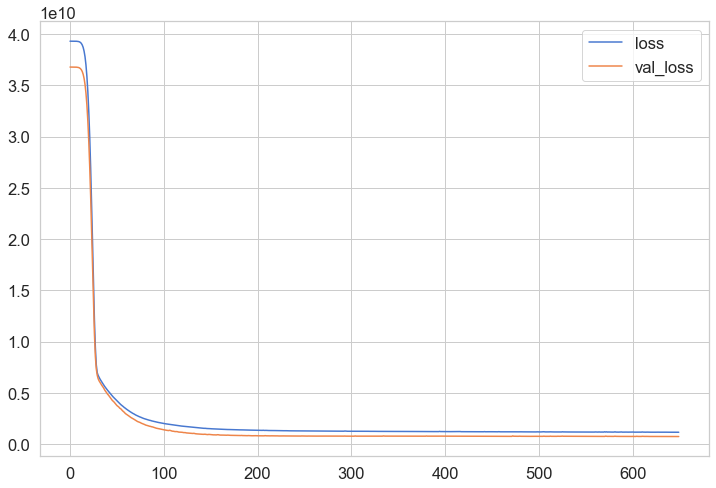

In [280]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

# Evaluation on Test Data

In [281]:
y_pred = model.predict(X_test)

In [282]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred)))

Mean Absolute Error: 19914.92
Mean Squared Error: 754121824.87
Root Mean Squared Error: 27461.28
Variance score is: 0.85


In [283]:
New_data['SalePrice'].mean()

180921.19589041095

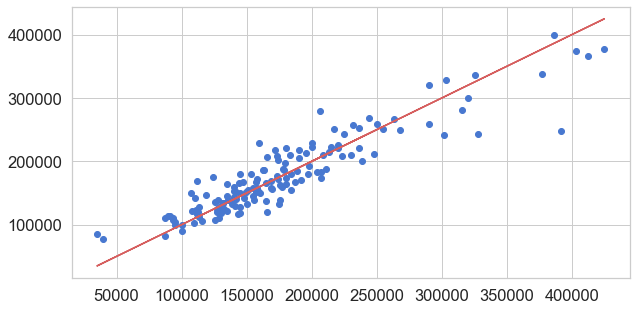

In [284]:
# Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

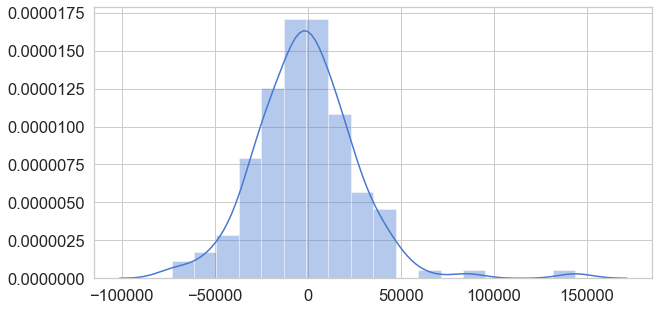

In [285]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

# Multiple Linear Regression vs Keras Regression

In [286]:
print('Model: Keras Regression\n')

print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error(MSE): {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error(RMSE): {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score: {:.2f}\n'.format(metrics.explained_variance_score(y_test,y_pred)*100))
print('*********************************\n')
print('Model: Multiple Linear Regression\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)*100))

Model: Keras Regression

Mean Absolute Error(MAE): 19914.92
Mean Squared Error(MSE): 754121824.87
Root Mean Squared Error(RMSE): 27461.28
Variance score: 85.15

*********************************

Model: Multiple Linear Regression

Mean Absolute Error(MAE): 23208.65
Mean Squared Error(MSE):984141394.09
Root Mean Squared Error(RMSE):31371.03
Variance score: 80.67


# 2nd Neural Network Model

In [342]:
# having 19 nueron is based on the number of available featurs

model5 = Sequential()

model5.add(Dense(19,activation='elu'))
model5.add(Dense(19,activation='elu'))
model5.add(Dense(19,activation='elu'))
model5.add(Dense(19,activation='elu'))
model5.add(Dense(19,activation='elu'))
#model5.add(Dense(10,activation='elu'))
#model5.add(Dense(11,activation='elu'))
#model5.add(Dense(12,activation='elu'))
#model5.add(Dense(12,activation='elu'))

model5.add(Dense(1))

model5.compile(optimizer='adam',loss='mse')

In [343]:
model5.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=650)

Train on 1314 samples, validate on 146 samples
Epoch 1/650
1314/1314 [==============================] - 2s 2ms/sample - loss: 39291313839.3425 - val_loss: 36769043357.8082
Epoch 2/650
1314/1314 [==============================] - 0s 24us/sample - loss: 39291026689.1689 - val_loss: 36768717501.3699
Epoch 3/650
1314/1314 [==============================] - 0s 28us/sample - loss: 39290596958.2953 - val_loss: 36768220538.7397
Epoch 4/650
1314/1314 [==============================] - 0s 30us/sample - loss: 39289936779.1050 - val_loss: 36767438511.3425
Epoch 5/650
1314/1314 [==============================] - 0s 27us/sample - loss: 39288912049.6804 - val_loss: 36766195964.4931
Epoch 6/650
1314/1314 [==============================] - 0s 27us/sample - loss: 39287269946.4475 - val_loss: 36764125660.9315
Epoch 7/650
1314/1314 [==============================] - 0s 31us/sample - loss: 39284460957.0289 - val_loss: 36760573587.2877
Epoch 8/650
1314/1314 [==============================] - 0s 27us/sample 

Epoch 65/650
1314/1314 [==============================] - 0s 24us/sample - loss: 9941218645.3333 - val_loss: 8614747318.3562
Epoch 66/650
1314/1314 [==============================] - 0s 23us/sample - loss: 9846787487.3668 - val_loss: 8521593645.5890
Epoch 67/650
1314/1314 [==============================] - 0s 24us/sample - loss: 9737796390.5753 - val_loss: 8425098744.9863
Epoch 68/650
1314/1314 [==============================] - 0s 22us/sample - loss: 9626965470.4901 - val_loss: 8336011895.2329
Epoch 69/650
1314/1314 [==============================] - 0s 23us/sample - loss: 9516995618.2892 - val_loss: 8248221667.9452
Epoch 70/650
1314/1314 [==============================] - 0s 27us/sample - loss: 9395670020.6758 - val_loss: 8141258787.0685
Epoch 71/650
1314/1314 [==============================] - 0s 27us/sample - loss: 9279898148.6271 - val_loss: 8029319841.3151
Epoch 72/650
1314/1314 [==============================] - 0s 24us/sample - loss: 9153525890.1431 - val_loss: 7909276026.7397


Epoch 130/650
1314/1314 [==============================] - 0s 24us/sample - loss: 1216442226.1674 - val_loss: 986928802.1918
Epoch 131/650
1314/1314 [==============================] - 0s 23us/sample - loss: 1212626239.0746 - val_loss: 981477902.0274
Epoch 132/650
1314/1314 [==============================] - 0s 23us/sample - loss: 1202326800.1705 - val_loss: 976691143.0137
Epoch 133/650
1314/1314 [==============================] - 0s 25us/sample - loss: 1197379956.8950 - val_loss: 971157001.6438
Epoch 134/650
1314/1314 [==============================] - 0s 28us/sample - loss: 1188823187.6773 - val_loss: 966123325.3699
Epoch 135/650
1314/1314 [==============================] - 0s 27us/sample - loss: 1188929555.6773 - val_loss: 959464899.5068
Epoch 136/650
1314/1314 [==============================] - 0s 24us/sample - loss: 1181703878.7215 - val_loss: 954728111.3425
Epoch 137/650
1314/1314 [==============================] - 0s 23us/sample - loss: 1168105787.1294 - val_loss: 950144070.1370


1314/1314 [==============================] - 0s 25us/sample - loss: 1015767568.2679 - val_loss: 833785404.9315
Epoch 195/650
1314/1314 [==============================] - 0s 24us/sample - loss: 1013853454.1248 - val_loss: 833120732.9315
Epoch 196/650
1314/1314 [==============================] - 0s 24us/sample - loss: 1014875473.0959 - val_loss: 830658267.1781
Epoch 197/650
1314/1314 [==============================] - 0s 25us/sample - loss: 1010941396.4079 - val_loss: 829347138.6301
Epoch 198/650
1314/1314 [==============================] - 0s 27us/sample - loss: 1014893566.0518 - val_loss: 827281333.4795
Epoch 199/650
1314/1314 [==============================] - 0s 24us/sample - loss: 1011804890.3014 - val_loss: 826669499.6164
Epoch 200/650
1314/1314 [==============================] - 0s 24us/sample - loss: 1008821365.7717 - val_loss: 825717242.7397
Epoch 201/650
1314/1314 [==============================] - 0s 24us/sample - loss: 1008637229.9787 - val_loss: 825660771.9452
Epoch 202/650


Epoch 259/650
1314/1314 [==============================] - 0s 23us/sample - loss: 959811306.4718 - val_loss: 786135031.2329
Epoch 260/650
1314/1314 [==============================] - 0s 23us/sample - loss: 955175374.3683 - val_loss: 779842304.0000
Epoch 261/650
1314/1314 [==============================] - 0s 27us/sample - loss: 954879230.8311 - val_loss: 778841170.4110
Epoch 262/650
1314/1314 [==============================] - 0s 30us/sample - loss: 955391183.6834 - val_loss: 788296663.6712
Epoch 263/650
1314/1314 [==============================] - 0s 24us/sample - loss: 953759636.8463 - val_loss: 784978667.3973
Epoch 264/650
1314/1314 [==============================] - 0s 23us/sample - loss: 961906911.4642 - val_loss: 779793322.0822
Epoch 265/650
1314/1314 [==============================] - ETA: 0s - loss: 1130830976.00 - 0s 22us/sample - loss: 944009362.0213 - val_loss: 785362021.6986
Epoch 266/650
1314/1314 [==============================] - 0s 24us/sample - loss: 956483890.2648 - v

Epoch 325/650
1314/1314 [==============================] - 0s 27us/sample - loss: 910967693.9300 - val_loss: 746649582.4658
Epoch 326/650
1314/1314 [==============================] - 0s 30us/sample - loss: 911455607.0381 - val_loss: 745750300.0548
Epoch 327/650
1314/1314 [==============================] - 0s 23us/sample - loss: 909627989.7230 - val_loss: 750644547.9452
Epoch 328/650
1314/1314 [==============================] - 0s 22us/sample - loss: 911754208.0487 - val_loss: 743720976.6575
Epoch 329/650
1314/1314 [==============================] - 0s 24us/sample - loss: 907202865.1933 - val_loss: 743537859.5068
Epoch 330/650
1314/1314 [==============================] - 0s 25us/sample - loss: 909436469.9665 - val_loss: 745886478.0274
Epoch 331/650
1314/1314 [==============================] - 0s 23us/sample - loss: 911059199.5129 - val_loss: 744795317.4795
Epoch 332/650
1314/1314 [==============================] - 0s 24us/sample - loss: 912221285.2116 - val_loss: 745950752.4384
Epoch 33

1314/1314 [==============================] - 0s 29us/sample - loss: 872452430.2222 - val_loss: 726258656.4384
Epoch 391/650
1314/1314 [==============================] - 0s 24us/sample - loss: 871218843.1781 - val_loss: 724173817.4247
Epoch 392/650
1314/1314 [==============================] - 0s 23us/sample - loss: 875309176.5967 - val_loss: 723664093.3699
Epoch 393/650
1314/1314 [==============================] - 0s 24us/sample - loss: 880382409.2542 - val_loss: 730314536.3288
Epoch 394/650
1314/1314 [==============================] - 0s 24us/sample - loss: 875937567.3668 - val_loss: 722823497.6438
Epoch 395/650
1314/1314 [==============================] - 0s 23us/sample - loss: 876233590.4536 - val_loss: 721368484.3836
Epoch 396/650
1314/1314 [==============================] - 0s 23us/sample - loss: 873314800.9498 - val_loss: 727839902.6849
Epoch 397/650
1314/1314 [==============================] - 0s 24us/sample - loss: 867830281.3516 - val_loss: 722080336.6575
Epoch 398/650
1314/131

1314/1314 [==============================] - 0s 23us/sample - loss: 839656073.7412 - val_loss: 701775479.6712
Epoch 457/650
1314/1314 [==============================] - 0s 21us/sample - loss: 840276708.3349 - val_loss: 702199929.4247
Epoch 458/650
1314/1314 [==============================] - 0s 24us/sample - loss: 837319762.9954 - val_loss: 710632155.1781
Epoch 459/650
1314/1314 [==============================] - 0s 21us/sample - loss: 840383897.6195 - val_loss: 711455737.8630
Epoch 460/650
1314/1314 [==============================] - 0s 21us/sample - loss: 837404226.2892 - val_loss: 703329991.8904
Epoch 461/650
1314/1314 [==============================] - 0s 22us/sample - loss: 839964276.7002 - val_loss: 702829527.2329
Epoch 462/650
1314/1314 [==============================] - 0s 23us/sample - loss: 837426346.7154 - val_loss: 701984285.8082
Epoch 463/650
1314/1314 [==============================] - 0s 23us/sample - loss: 836515946.6667 - val_loss: 703775605.4795
Epoch 464/650
1314/131

Epoch 522/650
1314/1314 [==============================] - 0s 21us/sample - loss: 814079735.0868 - val_loss: 687021915.1781
Epoch 523/650
1314/1314 [==============================] - 0s 24us/sample - loss: 815415953.3394 - val_loss: 688201677.1507
Epoch 524/650
1314/1314 [==============================] - 0s 23us/sample - loss: 814429676.6149 - val_loss: 690666583.6712
Epoch 525/650
1314/1314 [==============================] - 0s 24us/sample - loss: 818609309.9056 - val_loss: 696206495.1233
Epoch 526/650
1314/1314 [==============================] - 0s 24us/sample - loss: 815972604.3470 - val_loss: 688508246.7945
Epoch 527/650
1314/1314 [==============================] - 0s 22us/sample - loss: 812849882.6910 - val_loss: 688346306.6301
Epoch 528/650
1314/1314 [==============================] - 0s 21us/sample - loss: 815155202.8250 - val_loss: 692317539.9452
Epoch 529/650
1314/1314 [==============================] - 0s 22us/sample - loss: 815783502.1248 - val_loss: 686821777.5342
Epoch 53

Epoch 588/650
1314/1314 [==============================] - 0s 23us/sample - loss: 799462744.5479 - val_loss: 672638783.1233
Epoch 589/650
1314/1314 [==============================] - 0s 24us/sample - loss: 795925537.8995 - val_loss: 672894976.4384
Epoch 590/650
1314/1314 [==============================] - 0s 24us/sample - loss: 794941608.8158 - val_loss: 674699597.1507
Epoch 591/650
1314/1314 [==============================] - 0s 24us/sample - loss: 794072074.9102 - val_loss: 673604411.6164
Epoch 592/650
1314/1314 [==============================] - 0s 23us/sample - loss: 795762378.0335 - val_loss: 676007880.3288
Epoch 593/650
1314/1314 [==============================] - 0s 24us/sample - loss: 797303456.9254 - val_loss: 673411235.0685
Epoch 594/650
1314/1314 [==============================] - 0s 23us/sample - loss: 805109656.9376 - val_loss: 685067249.0959
Epoch 595/650
1314/1314 [==============================] - 0s 21us/sample - loss: 801381419.6408 - val_loss: 674322319.7808
Epoch 59

In [344]:
model5.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_181 (Dense)            multiple                  247       
_________________________________________________________________
dense_182 (Dense)            multiple                  380       
_________________________________________________________________
dense_183 (Dense)            multiple                  380       
_________________________________________________________________
dense_184 (Dense)            multiple                  380       
_________________________________________________________________
dense_185 (Dense)            multiple                  380       
_________________________________________________________________
dense_186 (Dense)            multiple                  20        
Total params: 1,787
Trainable params: 1,787
Non-trainable params: 0
___________________________________________________

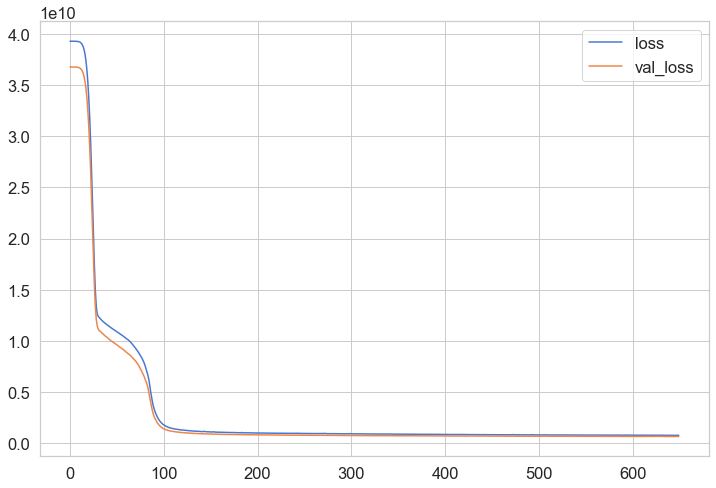

In [345]:
loss_df = pd.DataFrame(model5.history.history)
loss_df.plot(figsize=(12,8))

In [346]:
y_prediction = model5.predict(X_test)

In [347]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_prediction)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_prediction)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_prediction))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_prediction)))

Mean Absolute Error: 18733.01
Mean Squared Error: 663888974.46
Root Mean Squared Error: 25766.04
Variance score is: 0.87


In [352]:
print('Model: Keras Regression with elu activation function\n')

print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_prediction)))
print('Mean Squared Error(MSE): {:.2f}'.format(metrics.mean_squared_error(y_test, y_prediction)))
print('Root Mean Squared Error(RMSE): {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_prediction))))
print('Variance score: {:.2f}\n'.format(metrics.explained_variance_score(y_test,y_prediction)*100))
print('*********************************\n')
print('Model: Multiple Linear Regression\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)*100))

Model: Keras Regression with elu activation function

Mean Absolute Error(MAE): 18733.01
Mean Squared Error(MSE): 663888974.46
Root Mean Squared Error(RMSE): 25766.04
Variance score: 86.92

*********************************

Model: Multiple Linear Regression

Mean Absolute Error(MAE): 23208.65
Mean Squared Error(MSE):984141394.09
Root Mean Squared Error(RMSE):31371.03
Variance score: 80.67


# Linear Regression by using keras

In [97]:
from tensorflow.keras import Sequential
from tensorflow import keras

In [98]:
from tensorflow import keras

In [99]:
squareFeet = df_train[['GrLivArea']].values #x value
salePrice = df_train[['SalePrice']].values #y value

In [100]:
model = keras.Sequential()
model.add(keras.layers.Dense(1, input_shape=(1,)))
model.compile(keras.optimizers.Adam(lr=1), 'mean_squared_error')

model.fit(squareFeet,salePrice, epochs=50, batch_size=10)

Epoch 1/50
1460/1460 [==============================] - 0s 315us/sample - loss: 14325844209.0959
Epoch 2/50
1460/1460 [==============================] - 0s 93us/sample - loss: 3314880924.7123
Epoch 3/50
1460/1460 [==============================] - 0s 96us/sample - loss: 3186324284.4932
Epoch 4/50
1460/1460 [==============================] - 0s 96us/sample - loss: 3180523264.0000
Epoch 5/50
1460/1460 [==============================] - 0s 97us/sample - loss: 3208528901.8082
Epoch 6/50
1460/1460 [==============================] - 0s 106us/sample - loss: 3188855746.6301
Epoch 7/50
1460/1460 [==============================] - 0s 94us/sample - loss: 3202524951.1233
Epoch 8/50
1460/1460 [==============================] - 0s 91us/sample - loss: 3189592096.2192
Epoch 9/50
1460/1460 [==============================] - 0s 93us/sample - loss: 3201118346.9589
Epoch 10/50
1460/1460 [==============================] - 0s 94us/sample - loss: 3200157255.6712
Epoch 11/50
1460/1460 [=======================

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


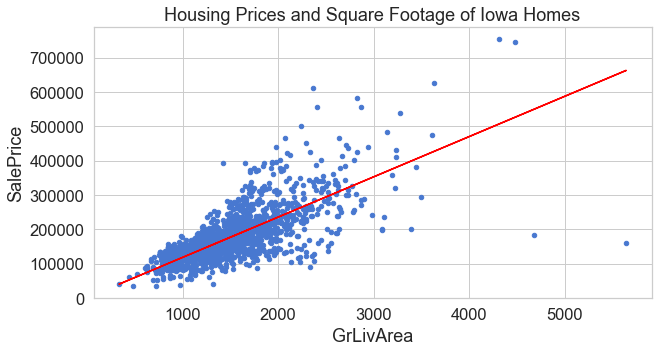

In [101]:
#Plot datapoints
df_train.plot(kind='scatter',
       x='GrLivArea',
       y='SalePrice', title='Housing Prices and Square Footage of Iowa Homes')


y_prediction = model.predict(squareFeet) #The predicted housing price based on square feet

#Plot the linear regression line
plt.plot(squareFeet, y_prediction, color='red')

In [102]:
newSF = 2000
print(model.predict([newSF]))

[[235545.39]]


# Neural Networks Model

In [103]:
#df_train

In [104]:
#df_train['OverallQual']

In [105]:
#df_train['GarageCars']

In [106]:
#df_train['SalePrice']


df2=df_train[['YearBuilt','2ndFlrSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','YrSold','SalePrice']]

In [107]:
#df2

In [108]:
X = df2.drop(columns=['SalePrice'])
Y = df2[['SalePrice']]

In [109]:
model6 = keras.models.Sequential()

model6.add(keras.layers.Dense(19, activation='relu', input_shape=(8,)))
#model6.add(keras.layers.Dense(19, activation='relu'))
#model6.add(keras.layers.Dense(19, activation='relu'))
#model6.add(keras.layers.Dense(19, activation='relu'))
#model6.add(keras.layers.Dense(18, activation='relu'))
#model6.add(keras.layers.Dense(18, activation='relu'))
#model6.add(keras.layers.Dense(18, activation='relu'))
model6.add(Dense(21,activation='selu'))
model6.add(Dense(19,activation='elu'))
model6.add(Dense(10,activation='relu'))
model6.add(Dense(28,activation='elu'))
model6.add(keras.layers.Dense(1))

model6.compile(optimizer='adam', loss='mean_squared_error')



In [110]:
model6.fit(X, Y, epochs=100, callbacks=[keras.callbacks.EarlyStopping(patience=3)])

#model6.fit(x=X_train,y=y_train,
#          validation_data=(X_test,y_test),
#          batch_size=128,epochs=400)

Epoch 1/100
1460/1460 [==============================] - 1s 369us/sample - loss: 39022486199.7589
Epoch 2/100
1460/1460 [==============================] - 0s 57us/sample - loss: 38466528578.6301
Epoch 3/100
1460/1460 [==============================] - 0s 50us/sample - loss: 33910286655.8247
Epoch 4/100
1460/1460 [==============================] - 0s 55us/sample - loss: 14946666242.1041
Epoch 5/100
1460/1460 [==============================] - 0s 48us/sample - loss: 4389818766.3781
Epoch 6/100
1460/1460 [==============================] - 0s 51us/sample - loss: 4203062612.1644
Epoch 7/100
1460/1460 [==============================] - 0s 53us/sample - loss: 4073569417.4685
Epoch 8/100
1460/1460 [==============================] - 0s 58us/sample - loss: 3970347517.8959
Epoch 9/100
1460/1460 [==============================] - 0s 45us/sample - loss: 3852542504.6795
Epoch 10/100
1460/1460 [==============================] - 0s 41us/sample - loss: 3744466799.5178
Epoch 11/100
1460/1460 [==========

Epoch 29/100
1460/1460 [==============================] - 0s 41us/sample - loss: 2662513644.3616
Epoch 30/100
1460/1460 [==============================] - 0s 43us/sample - loss: 2663087688.9425
Epoch 31/100
1460/1460 [==============================] - 0s 43us/sample - loss: 2648536567.2329
Epoch 32/100
1460/1460 [==============================] - 0s 41us/sample - loss: 2665773932.0110
Epoch 33/100
1460/1460 [==============================] - 0s 42us/sample - loss: 2639749385.8192
Epoch 34/100
1460/1460 [==============================] - 0s 41us/sample - loss: 2650961852.6685
Epoch 35/100
1460/1460 [==============================] - 0s 41us/sample - loss: 2646088243.9014
Epoch 36/100
1460/1460 [==============================] - 0s 42us/sample - loss: 2651136658.5863
Epoch 37/100
1460/1460 [==============================] - 0s 41us/sample - loss: 2618143741.1945
Epoch 38/100
1460/1460 [==============================] - 0s 40us/sample - loss: 2653200772.5589
Epoch 39/100
1460/1460 [======

1460/1460 [==============================] - 0s 39us/sample - loss: 2601896534.9699
Epoch 58/100
1460/1460 [==============================] - 0s 41us/sample - loss: 2617758823.1014
Epoch 59/100
1460/1460 [==============================] - 0s 40us/sample - loss: 2597104588.8000
Epoch 60/100
1460/1460 [==============================] - 0s 38us/sample - loss: 2584156275.7260
Epoch 61/100
1460/1460 [==============================] - 0s 39us/sample - loss: 2594202373.2603
Epoch 62/100
1460/1460 [==============================] - 0s 40us/sample - loss: 2599225010.1479
Epoch 63/100
1460/1460 [==============================] - 0s 47us/sample - loss: 2596900806.1370
Epoch 64/100
1460/1460 [==============================] - 0s 39us/sample - loss: 2578611261.3699
Epoch 65/100
1460/1460 [==============================] - 0s 40us/sample - loss: 2593368383.1233
Epoch 66/100
1460/1460 [==============================] - 0s 41us/sample - loss: 2587188425.2932
Epoch 67/100
1460/1460 [===================

1460/1460 [==============================] - 0s 40us/sample - loss: 2565324886.9699
Epoch 86/100
1460/1460 [==============================] - 0s 38us/sample - loss: 2559365700.7342
Epoch 87/100
1460/1460 [==============================] - 0s 39us/sample - loss: 2560020727.2329
Epoch 88/100
1460/1460 [==============================] - 0s 38us/sample - loss: 2567615899.0027
Epoch 89/100
1460/1460 [==============================] - 0s 39us/sample - loss: 2555884061.1068
Epoch 90/100
1460/1460 [==============================] - 0s 39us/sample - loss: 2563744966.1370
Epoch 91/100
1460/1460 [==============================] - 0s 39us/sample - loss: 2572417857.9288
Epoch 92/100
1460/1460 [==============================] - 0s 40us/sample - loss: 2569891698.3233
Epoch 93/100
1460/1460 [==============================] - 0s 41us/sample - loss: 2539708717.2384
Epoch 94/100
1460/1460 [==============================] - 0s 40us/sample - loss: 2546803380.9534
Epoch 95/100
1460/1460 [===================

In [111]:
test_data = np.array([2003,854,1710,2,1,3,8,2008])

print(model6.predict(test_data.reshape(1,8), batch_size=1))

[[179363.05]]
